# About This Project

This analysis was developed as part of my capstone project for the DSGA1001 course on the MS in Data Science program at NYU's Courant Institute of Mathematics, Computing and Data Science. The original submission is a comprehensive investigation into patterns behind professor ratings on a website called Rate My Professor (where my own DS Prof happens to have a stellar rating, might I add) . We were provided a bunch of data sets pulled from the website and a set of research questions to explore. 

### What you'll find here
Rather than presenting the entire capstone (which is quite lengthy and probably still being used to assess the newer cohorts), I have curated only the most interesting methodologies to showcase my analytical approach and key learnings. 

While the findings themselves might not revolutionize how we think about professor ratings, this project showcases something I value more: **methodological rigor when the data doesn't cooperate**.

Real-world data is messy. This analysis forced me to navigate:
- **Sparse data challenges** — working with limited tags in certain categories
- **Non-standard distributions** — when your data violates assumptions, you adapt
- **Edge cases** — bending traditional techniques when textbook approaches fall short

**The focus here isn't groundbreaking discoveries** — it's demonstrating how the course taught me to think through analytical obstacles. How do you extract reliable insights when the data isn't perfect? When do you choose a non-parametric test over the standard approach? How do you communicate uncertainty honestly while still providing value and defending your choices?

These are the skills that matter in real data science work, and that's what I want to highlight in this portfolio piece.

### Research questions covered in this presentation

- **Preliminary data expolration + advanced data transformation** Introducing the datasets followed by some basic hygiene checks such as shape, size and type of data. 

- **Non Parametric Hypothesis Testing** Is there is a gender bias between the average professor ratings of male and female professors? Contextualising the results with effect sizes to determine practical significance. 

- **Linear Regression Modelling** Predicting a professor's average rating based on certain features available in the dataset.



# Chapter 1: Introducing the Dataset

Out of all the data provided to us from Rate My Professor, two .csv files were used for the analysis presented in this post.

The first file contained more definitive information which is available for all professors on RMP - i.,e average rating, average difficulty, gender, number of ratings, etc.

The second file contained behavioural tags which the students mark a professor with - this is optional and students can choose atmost 3 tags (out of 20) for any given professor. Examples of tags include - 'inspirational', 'tough grader', 'respected'. etc.

## 1.1. Data cleaning

Both the dataframes had 89,892 rows where rach row represents the data associated with a single professor. 

At this stage the column labels in the raw data were ambiguous so I re-lablled these based on the information provided to us in the spec sheet in class. 

Then I merged both the dataframes into a single object to simplify further analysis.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

# Load the datasets
av_ratings_df  = pd.read_csv("../rmpCapstoneNum.csv")
df_tags = pd.read_csv("../rmpCapstoneTags.csv")

print(av_ratings_df.shape)
print("Unformatted file containing with ambiguous column names numerical data - firs column '5' shows average ratings")
av_ratings_df.head()


(89892, 8)
Unformatted file containing with ambiguous column names numerical data - firs column '5' shows average ratings


,5,1.5,2,0,NaN,0.1,0.2,1
0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,3.2,3.0,4.0,0.0,NaN,0.0,1,0
2,3.6,3.5,10.0,1.0,NaN,0.0,0,0
3,1.0,5.0,1.0,0.0,NaN,0.0,0,0
4,3.5,3.3,22.0,0.0,56.0,7.0,1,0


In [8]:
print(df_tags.shape)
df_tags.head()

(89892, 20)


,0,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,1.1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3


In [9]:

# Rename columns
av_ratings_df.columns = [
    "Average Rating",
    "Average Difficulty",
    "Number of ratings",
    "Hot or Not",
    "Take class again",
    "Online class ratings",
    "Male",
    "Female"
]

# Display head only
av_ratings_df.head()


,Average Rating,Average Difficulty,Number of ratings,Hot or Not,Take class again,Online class ratings,Male,Female
0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,3.2,3.0,4.0,0.0,NaN,0.0,1,0
2,3.6,3.5,10.0,1.0,NaN,0.0,0,0
3,1.0,5.0,1.0,0.0,NaN,0.0,0,0
4,3.5,3.3,22.0,0.0,56.0,7.0,1,0


In [10]:

# Load tags dataset
tags_df = pd.read_csv("../rmpCapstoneTags.csv")

# Rename all 20 columns
tags_df.columns = [
    "Tough grader",
    "Good feedback",
    "Respected",
    "Lots to read",
    "Participation matters",
    "Don’t skip class or you will not pass",
    "Lots of homework",
    "Inspirational",
    "Pop quizzes!",
    "Accessible",
    "So many papers",
    "Clear grading",
    "Hilarious",
    "Test heavy",
    "Graded by few things",
    "Amazing lectures",
    "Caring",
    "Extra credit",
    "Group projects",
    "Lecture heavy"
]

# Display head only
tags_df.head()


,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don’t skip class or you will not pass,Lots of homework,Inspirational,Pop quizzes!,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3


In [11]:
# Merge by concatenating columns
merged_df = pd.concat([av_ratings_df, tags_df], axis=1)

# Check the result
print(merged_df.shape)
print("\n Merged and re-labelled dataframe for analysis")
merged_df.head()


(89892, 28)

 Merged and re-labelled dataframe for analysis


,Average Rating,Average Difficulty,Number of ratings,Hot or Not,Take class again,Online class ratings,Male,Female,Tough grader,Good feedback,...,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.2,3.0,4.0,0.0,NaN,0.0,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0
2,3.6,3.5,10.0,1.0,NaN,0.0,0,0,6,3,...,0,2,1,0,0,0,0,0,1,0
3,1.0,5.0,1.0,0.0,NaN,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,3.3,22.0,0.0,56.0,7.0,1,0,8,13,...,0,7,3,0,0,0,3,0,1,3


In [12]:
merged_df.describe()

,Average Rating,Average Difficulty,Number of ratings,Hot or Not,Take class again,Online class ratings,Male,Female,Tough grader,Good feedback,...,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
count,70003.000000,70003.000000,70003.000000,70003.000000,12160.000000,70003.000000,89892.000000,89892.000000,89892.000000,89892.000000,...,89892.000000,89892.000000,89892.000000,89892.000000,89892.000000,89892.000000,89892.000000,89892.000000,89892.000000,89892.000000
mean,3.807997,2.864643,5.374770,0.279931,76.417105,0.315615,0.326792,0.301896,0.753771,1.004617,...,0.112969,0.550794,0.498732,0.126196,0.118142,0.483769,0.855738,0.402672,0.204201,0.394918
std,1.126894,0.991057,8.136676,0.448968,25.011441,1.054735,0.469043,0.459083,1.985597,2.485242,...,0.550806,1.464692,2.063500,0.693773,0.501118,1.807557,2.158979,1.660904,0.949807,1.189550
min,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,3.000000,0.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.800000,3.500000,6.000000,1.000000,100.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,393.000000,1.000000,100.000000,19.000000,1.000000,1.000000,112.000000,171.000000,...,64.000000,77.000000,224.000000,81.000000,39.000000,136.000000,127.000000,128.000000,92.000000,38.000000


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89892 entries, 0 to 89891
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Average Rating                         70003 non-null  float64
 1   Average Difficulty                     70003 non-null  float64
 2   Number of ratings                      70003 non-null  float64
 3   Hot or Not                             70003 non-null  float64
 4   Take class again                       12160 non-null  float64
 5   Online class ratings                   70003 non-null  float64
 6   Male                                   89892 non-null  int64  
 7   Female                                 89892 non-null  int64  
 8   Tough grader                           89892 non-null  int64  
 9   Good feedback                          89892 non-null  int64  
 10  Respected                              89892 non-null  int64  
 11  Lo

## 1.2. Null Values
Out of approx. 89000 records, around 19000 rows were dropped because they lacked the variable of interest - average ratings. I avoided imputation as the missing values were not missing at random and imputing could introduce bias.

In [14]:
#dont delete cell
# Drop rows without ratings data from merged_df (modifies in place)

merged_df.dropna(subset=['Average Rating', 'Number of ratings'], inplace=True)

merged_df.shape


(70003, 28)



# Chapter 2: EDA - Not all Averages are created Equal

### Using Bayesian Shrinkage to improve the reliability of Average Ratings.

The variable of interest for the research questions addressed in this presentation is Average Ratings. 

Each professor has an average rating between 1-5, given by some 'N' number of students (more on this later).

At first glance, professor ratings seem overly generous. Half of all professors scored above 4.0 on a 5-point scale.

![RMP original ratings](../images/RMP_org_ratings.png)

Average ratings are bunched up near the top, with a long tail stretching toward the lower end - a classic left-skewed distribution.



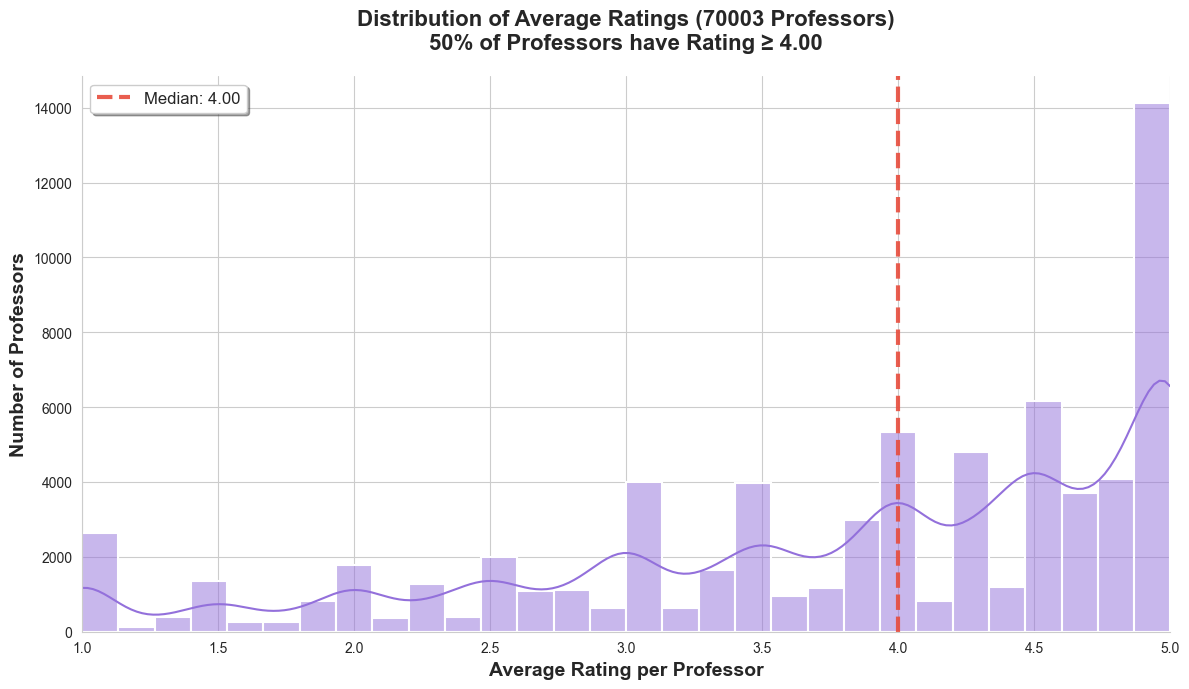

In [15]:
#dont delete
# PLOT OF AV RATINGS

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Histogram with smooth KDE overlay
sns.histplot(data=merged_df, x='Average Rating', 
             bins=30, 
             color='mediumpurple',
             edgecolor='white',
             linewidth=1.5,
             kde=True)

# Calculate median and count
median_ratings = merged_df['Average Rating'].median()
num_professors = len(merged_df)

# Add median line
plt.axvline(median_ratings, color='#e74c3c', linestyle='--', linewidth=3, 
            label=f'Median: {median_ratings:.2f}', alpha=0.9)

plt.xlabel('Average Rating per Professor', fontsize=14, fontweight='bold')
plt.ylabel('Number of Professors', fontsize=14, fontweight='bold')
plt.title(f'Distribution of Average Ratings ({num_professors} Professors)\n50% of Professors have Rating ≥ {median_ratings:.2f}', 
          fontsize=16, fontweight='bold', pad=20)

plt.xlim(1, 5)
plt.legend(fontsize=12, frameon=True, shadow=True)
sns.despine()
plt.tight_layout()
plt.show()

## 2.1. Why the Skew? A 'Cardinal' Problem

Before we close in on the beef of our analysis(ie the hypothesis testing, regression, etc), we need to acknowledge something fundamental: ***Rating scales aren't the most numerically accurate of all measurement instruments.***

Ratings data is oblivious to one of the holy trinity of numerical properties - ***cardinality*** (it is largely ordinal and to some extent nominal as well). 

The psychological difference between a 3 and a 4 isn't the same as between a 4 and a 5 in students' minds (contrary to to the mathematical distance between the two pairs). 

This creates two structural issues:

- **Scale Psychology:**  Students don't use the scale evenly. Some may mentally treat
5 = Excellent, 4 = Good/Acceptable, 3 = Disappointing (not "average"), 1-2 = Terrible
whislt others may treat 5 = Excellent, 4 = Very Good, 3 = Average or Acceprable, 2= Terrible , 1= Do I even need to bother rating? The mathematical midpoint (3.0) becomes a psychological "failure," for some and "neutrality" for others.

- **Ceiling effect:** On a bounded 1-5 scale, there's limited room at the top. A truly exceptional professor can't score higher than 5, compressing all "great" professors into a narrow band. Whereas those with an average rating < 4, have more room to spread out.

***These aren't data problems we can fix - they're structural limitations of the rating scale itself.***

## 2.2. Could the Average Ratings be skewed due to Selection Bias?

Another afterthought: maybe only satisfied students bother rating, filtering out negative experiences entirely. If bad or unpopular professors simply don't get rated, this dataset might only capture "survivors."

Let us check how many students typically rate each professor:

![AvNumReviews](../images/AvNumReviews.png)





**On average, professors were rated by 5 students (std deviation = 8)** 

Half the profs have been rated by only 3 students (the median). The interquartile range for 'Number of Ratings' sits around 6-10 ratings per professor. This is universally sparse.

But here's what's interesting: when run a medial split professors by average rating, both groups look somewhat identical:

**-Professors with Average Rating > 4:**
  
  Mean number of ratings: 5.7
  
  Median number of ratings: 3.0

  

**-Professors with Average Rating ≤ 4:**

 Mean number of ratings: 5.1
 
 Median number of rating ratings: 3.0

 

**This suggests low-ranked professors aren't being ignored - they're just as under-reviewed as everyone else**

While some form of selection or surviorship bias may exist for the popular or tenure professors, but it's not completely filtering out low-rated professors from the dataset. They're here - they just have tiny, unreliable sample sizes.

## 2.3. Does More Data Fix the Skew?
I wondered: maybe the skew is just noise from small samples (small samples = less number of students rating a professor). What if we only look at professors with substantial rating histories?

![tripleReviewplots](../images/tripleReviewplots.png)

Not only does more data NOT FIX the skew, in fact, it ***enhances*** it with larger samples. But something else happens:

n ≥ 10: Median rating = 4.0

n ≥ 30: Median rating = 4.3

n ≥ 100: Median rating = 4.6

Professors with more ratings trend higher. This could mean:


- The median rating increases from 4 for all professors to 4.3–4.65 among those with more than 100 ratings, reflecting both reduced variability from larger sample sizes and the tendency for more widely taught or popular professors to accumulate more ratings. (This signals some level of mild selection/ surviorship bias filtering out the low-ranked professors. If low-rank professors were equally represented, the median wouldn't rise as we increased n, it would shift left-ward).

- Despite this, however, the left-skewed shape persists, indicating that ceiling effects and asymmetric scale usage remain the primary drivers of the skew.

But here's the problem: only a handful of professors have 100+ ratings. The vast majority are stuck with 1-10 reviews - too few to be reliable.


## 2.4. In Summary: The Real Problem
We have two separate issues:

**1. The skew** - Ratings trend positive due to scale psychology, ceiling effects, and possibly mild selection bias

**2. Unreliable sample sizes** - The bulk of ratings are based on 5 reviews or fewer.

We can't fix issue #1 (it's baked into how rating scales work). But we can fix issue #2!

In [16]:
# dont delete. Median rating split professors into two groups
high_rated = merged_df[merged_df['Average Rating'] > 4]
low_rated = merged_df[merged_df['Average Rating'] <= 4]

# Compare number of ratings
print("=== Rating Count Comparison ===")
print(f"\nProfessors with Rating > 4:")
print(f"  Median ratings: {high_rated['Number of ratings'].median():.1f}")
print(f"  Mean ratings: {high_rated['Number of ratings'].mean():.1f}")

print(f"\nProfessors with Rating ≤ 4:")
print(f"  Median ratings: {low_rated['Number of ratings'].median():.1f}")
print(f"  Mean ratings: {low_rated['Number of ratings'].mean():.1f}")



'''plt.figure(figsize=(10, 6))

# Create side-by-side box plots with better visibility
data_to_plot = [high_rated['Number of ratings'].values, 
                low_rated['Number of ratings'].values]

bp = plt.boxplot(data_to_plot,
                 labels=['Rating > 4', 'Rating ≤ 4'],
                 patch_artist=True,
                 widths=0.6,
                 showfliers=True)  # Hide outliers for cleaner view

# Color the boxes
colors = ['mediumpurple', 'coral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add median values as text
median_high = high_rated['Number of ratings'].median()
median_low = low_rated['Number of ratings'].median()

plt.text(1, median_high + 1, f'Median: {median_high:.0f}', 
         ha='center', fontsize=11, fontweight='bold')
plt.text(2, median_low + 1, f'Median: {median_low:.0f}', 
         ha='center', fontsize=11, fontweight='bold')

plt.ylabel('Number of Ratings', fontsize=12, fontweight='bold')
plt.title('Rating Counts: Similar Across Both Groups', 
          fontsize=14, fontweight='bold')
plt.ylim(0, 20)  # Zoom in on the relevant range
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()'''

=== Rating Count Comparison ===

Professors with Rating > 4:
  Median ratings: 3.0
  Mean ratings: 5.7

Professors with Rating ≤ 4:
  Median ratings: 3.0
  Mean ratings: 5.1


"plt.figure(figsize=(10, 6))\n\n# Create side-by-side box plots with better visibility\ndata_to_plot = [high_rated['Number of ratings'].values, \n                low_rated['Number of ratings'].values]\n\nbp = plt.boxplot(data_to_plot,\n                 labels=['Rating > 4', 'Rating ≤ 4'],\n                 patch_artist=True,\n                 widths=0.6,\n                 showfliers=True)  # Hide outliers for cleaner view\n\n# Color the boxes\ncolors = ['mediumpurple', 'coral']\nfor patch, color in zip(bp['boxes'], colors):\n    patch.set_facecolor(color)\n    patch.set_alpha(0.7)\n\n# Add median values as text\nmedian_high = high_rated['Number of ratings'].median()\nmedian_low = low_rated['Number of ratings'].median()\n\nplt.text(1, median_high + 1, f'Median: {median_high:.0f}', \n         ha='center', fontsize=11, fontweight='bold')\nplt.text(2, median_low + 1, f'Median: {median_low:.0f}', \n         ha='center', fontsize=11, fontweight='bold')\n\nplt.ylabel('Number of Ratings', font

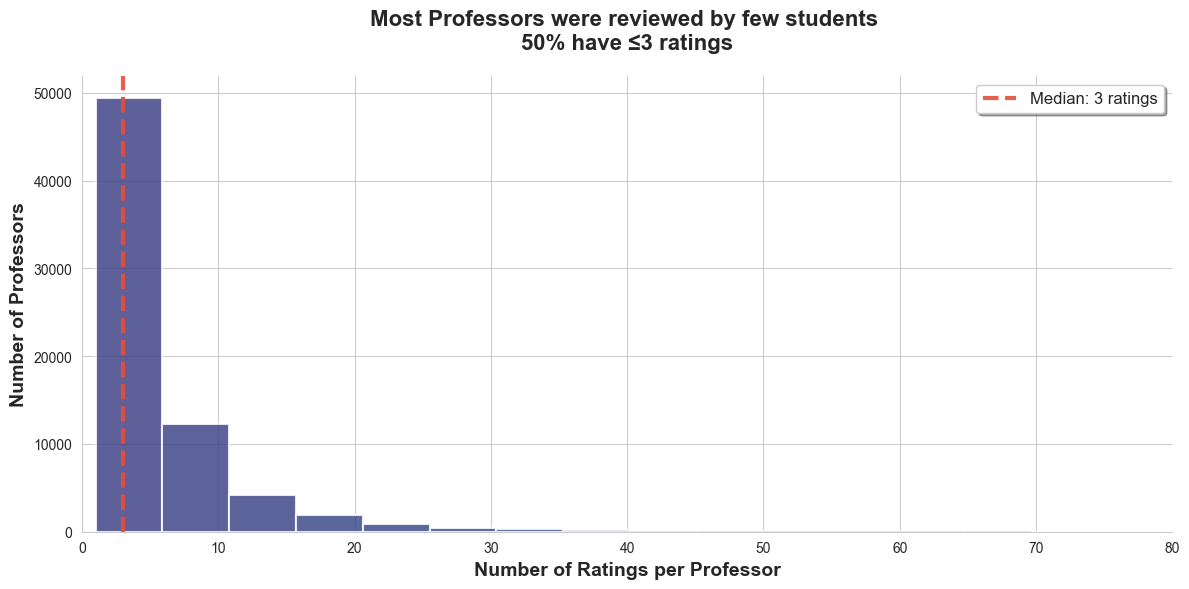

In [17]:
#dont delete. How many ratings is the 'average ratings' attribute computed from?

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create histogram with gradient effect
n, bins, patches = plt.hist(merged_df['Number of ratings'], 
                             bins=80, 
                             edgecolor='white', 
                             linewidth=1.5,
                             alpha=0.85)

# Apply gradient colors to bars
cm = plt.cm.viridis
colors = cm(np.linspace(0.2, 0.9, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Add median line with annotation
median_ratings = merged_df['Number of ratings'].median()
plt.axvline(median_ratings, color='#e74c3c', linestyle='--', linewidth=3, 
            label=f'Median: {median_ratings:.0f} ratings', alpha=0.9)

# Styling
plt.xlabel('Number of Ratings per Professor', fontsize=14, fontweight='bold')
plt.ylabel('Number of Professors', fontsize=14, fontweight='bold')
plt.title('Most Professors were reviewed by few students \n50% have ≤3 ratings', 
          fontsize=16, fontweight='bold', pad=20)



# ZOOM IN on the concentrated area
plt.xlim(0, 80)  # Adjust this range as needed

plt.legend(fontsize=12, frameon=True, shadow=True)


# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()
plt.show()

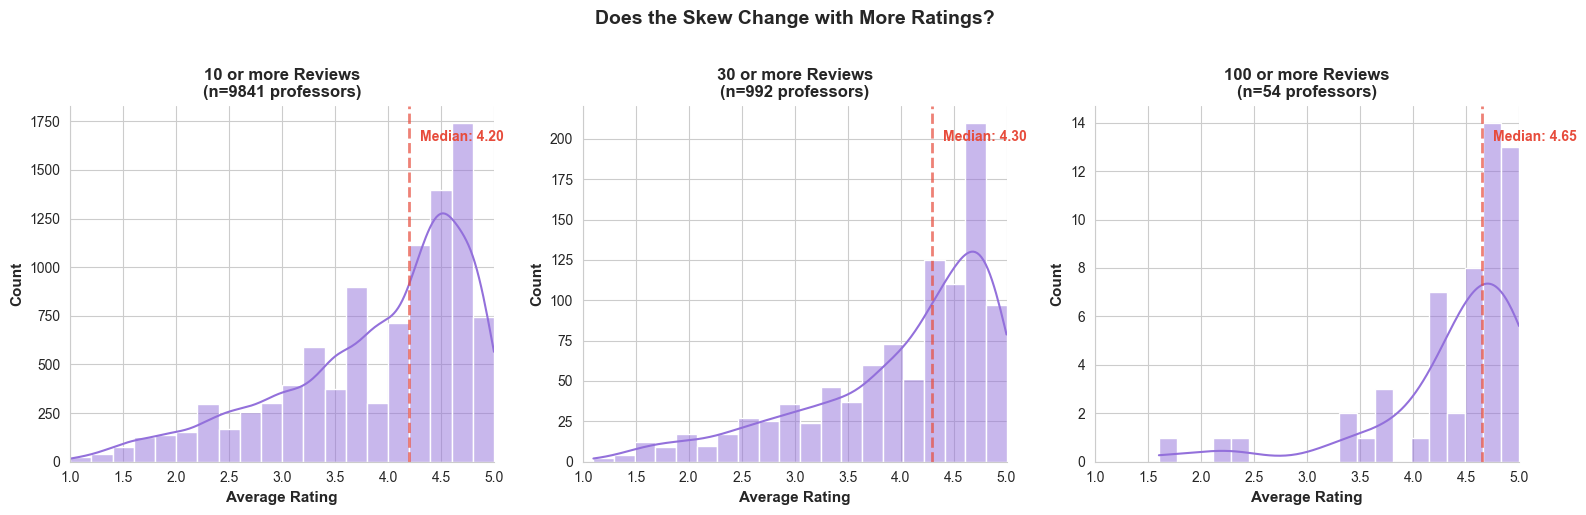

In [18]:

# dont delete. Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Define thresholds
thresholds = [10, 30, 100]
titles = ['10 or more Reviews', '30 or more Reviews', '100 or more Reviews']

for ax, threshold, title in zip(axes, thresholds, titles):
    # Filter data
    filtered_df1 = merged_df[merged_df['Number of ratings'] >= threshold]
    
    # Plot histogram with KDE
    sns.histplot(data=filtered_df1, x='Average Rating',
                 bins=20,
                 color='mediumpurple',
                 edgecolor='white',
                 linewidth=1,
                 kde=True,
                 ax=ax)
    
    # Formatting
    ax.set_xlabel('Average Rating', fontsize=11, fontweight='bold')
    ax.set_ylabel('Count', fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\n(n={len(filtered_df1)} professors)', 
                 fontsize=12, fontweight='bold')
    ax.set_xlim(1, 5)
    
    # Add median line
    median = filtered_df1['Average Rating'].median()
    ax.axvline(median, color='#e74c3c', linestyle='--', 
               linewidth=2, alpha=0.7)
    ax.text(median + 0.1, ax.get_ylim()[1] * 0.9, 
            f'Median: {median:.2f}',
            fontsize=10, color='#e74c3c', fontweight='bold')

plt.suptitle('Does the Skew Change with More Ratings?', 
             fontsize=14, fontweight='bold', y=1.02)
sns.despine()
plt.tight_layout()
plt.show()

## 2.5. Not all Averages are created Equal

Here's a thought experiment: Would you trust a restaurant with a single 5-star review, or one with 500 reviews averaging 4.8?

Hopefully you said the second one. Sample size matters.

A professor with a single enthusiastic freshman can have a 5.0 average. A single disgruntled student can create a 1.0. With only 3 median reviews, average ratings are unstable.

![RatingStability](../images/Ratingstability.png)

Notice how ratings jump around wildly when sample sizes are small? The variance is extreme at the low end.

Therefore average ratings for professors who were reviewed by a smaller number of students may not be the most representative of the entire population of students who took that professor’s class. 

As rule of thumb originating from the Central Limit Theorem and Law of Large numbers, we need typically require a sample size of n>= 30 in order for any average to reliabily reflect the true population’s sentiment and reduce sampling variation. 



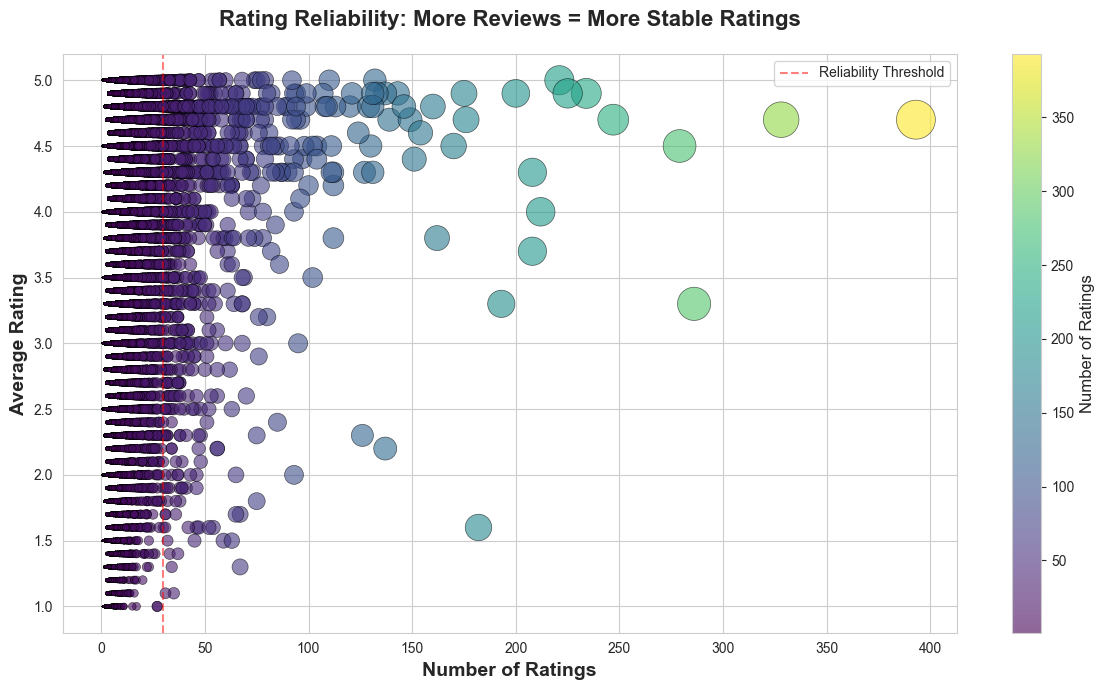

In [19]:

# dont delete Set plot style

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Create scatter plot
scatter = plt.scatter(
    merged_df['Number of ratings'], 
    merged_df['Average Rating'],
    c=merged_df['Number of ratings'],  # Color by count
    s=merged_df['Number of ratings']*2,  # Size by count
    alpha=0.6,
    cmap='viridis',  # Color palette
    edgecolors='black',
    linewidth=0.5
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Ratings', fontsize=12)

# Labels and title
plt.xlabel('Number of Ratings', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold')
plt.title('Rating Reliability: More Reviews = More Stable Ratings', 
          fontsize=16, fontweight='bold', pad=20)

# Optional: Add vertical line at "reliability threshold"
plt.axvline(x=30, color='red', linestyle='--', alpha=0.5, label='Reliability Threshold')
plt.legend()

plt.tight_layout()
plt.show()

## 2.6. Bayesian Shrinkage Adjustment for Professor Ratings

As seen in chapter 1, restricting the analysis to professors with many ratings would leave us to work with only a fraction of the dataset (example n>30 gives only 992 profs). While those ratings are more reliable, such filtering risks amplifying the selection bias by overrepresenting popular professors. On the other hand, analysing ALL ratings based on reviews from a handful of students, introduces substantial sampling variability.

To address this tradeoff, I applied a Bayesian shrinkage estimator to professor-level average ratings and difficulty scores. (Note - Let's not get thrown off the guard with 'Bayesian' in that title. It just refelects an 'update'. The ultimate approach of hypohtesis testing in subsequent chapters still remains very much Frquentist.) 

The purpose of the Bayesian shrinkage estimator is to stablise average ratings by shrinking noisy, low-sample averages toward a global mean, while leaving high-sample averages largely unchanged.

Intuitively, a rating of 4.8 based on 5 students is pulled slightly downward toward the global mean, while a rating of 1.2 based on 5 students is pulled upward toward the same mean. 





In [20]:
merged_df.head()

,Average Rating,Average Difficulty,Number of ratings,Hot or Not,Take class again,Online class ratings,Male,Female,Tough grader,Good feedback,...,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
1,3.2,3.0,4.0,0.0,NaN,0.0,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0
2,3.6,3.5,10.0,1.0,NaN,0.0,0,0,6,3,...,0,2,1,0,0,0,0,0,1,0
3,1.0,5.0,1.0,0.0,NaN,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,3.3,22.0,0.0,56.0,7.0,1,0,8,13,...,0,7,3,0,0,0,3,0,1,3
5,2.3,3.5,2.0,0.0,NaN,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.7. Computing the Bayesian-adjusted Average Ratings

The Bayesian-adjusted rating for professor $i$ is:

$$
\text{AdjustedRating}_i
=
\frac{n_i \, \bar{x}_i + k \, \mu}{n_i + k}
$$

where:

- $\bar{x}_i$ is the observed average rating (or difficulty) for professor $i$
- $n_i$ is the number of student ratings for professor $i$
- $\mu$ is the global mean rating
- $k$ is the shrinkage parameter (here $k = 5$, corresponding to light shrinkage)

The global mean $\mu$ is computed as a rating-count–weighted average:

$$
\mu
=
\frac{\sum_i n_i \bar{x}_i}{\sum_i n_i}
$$

Tip - think of the global mean as what we computed in high school (average price of fruits = total price of all fruits/ total fruits sold)

This estimator reduces noise from small-sample averages without excluding less frequently rated professors.

Quick ask - if you are aware about any other rating tranformers which would me more efficient here, pls feel free to share.



In [21]:
# dont delete cell

#Steps to compute Bayesian-adjusted averages

# 1 Filter merged_df for professors with more than 3 ratings (split by median number ratings)
filtered_df = merged_df[merged_df["Number of ratings"] > 3].reset_index(drop=True)


# 2 Weighted global mean for Average Rating
mu_rating = (
    filtered_df["Average Rating"] * filtered_df["Number of ratings"]
).sum() / filtered_df["Number of ratings"].sum()

# 3 Weighted global mean for Average Difficulty
mu_difficulty = (
    filtered_df["Average Difficulty"] * filtered_df["Number of ratings"]
).sum() / filtered_df["Number of ratings"].sum()

print("Weighted global mean rating:", round(mu_rating, 3))
print("Weighted global mean difficulty:", round(mu_difficulty, 3))

# Check the result
filtered_df.head()
filtered_df.shape
print("31951 rows (out of approx 70K following initial data cleaning) \n were available with more than 3 reviews following the median split on reviews. \n Bayesian shrinkage was performed only for these.")


Weighted global mean rating: 3.888
Weighted global mean difficulty: 2.936
31951 rows (out of approx 70K following initial data cleaning) 
 were available with more than 3 reviews following the median split on reviews. 
 Bayesian shrinkage was performed only for these.


In [22]:
#dont delete cell . Bayesian-adjusted Average Rating

#4. Add column for Baye's adjusted Avg rating and compute it using the formula
k = 5
filtered_df["AvgRating_Bayes"] = (
    filtered_df["Average Rating"] * filtered_df["Number of ratings"]
    + mu_rating * k
) / (filtered_df["Number of ratings"] + k)

# Bayesian-adjusted Average Difficulty
filtered_df["AvgDifficulty_Bayes"] = (
    filtered_df["Average Difficulty"] * filtered_df["Number of ratings"]
    + mu_difficulty * k
) / (filtered_df["Number of ratings"] + k)

# Inspect
filtered_df[
    ["Average Rating", "AvgRating_Bayes",
     "Average Difficulty", "AvgDifficulty_Bayes",
     "Number of ratings"]
].head(10)

,Average Rating,AvgRating_Bayes,Average Difficulty,AvgDifficulty_Bayes,Number of ratings
0,3.2,3.582407,3.0,2.964181,4.0
1,3.6,3.696111,3.5,3.311842,10.0
2,3.5,3.571913,3.3,3.232505,22.0
3,2.6,3.315740,4.5,3.630847,4.0
4,2.6,3.029444,4.1,3.711842,10.0
5,4.3,4.201984,3.3,3.213220,16.0
6,4.8,4.293518,2.5,2.741959,4.0
7,4.1,4.018590,1.8,2.236741,8.0
8,2.2,3.044166,4.4,3.667763,5.0
9,3.5,3.577667,3.2,3.147105,20.0


Raw Median: 4.10
Bayesian Median: 3.99


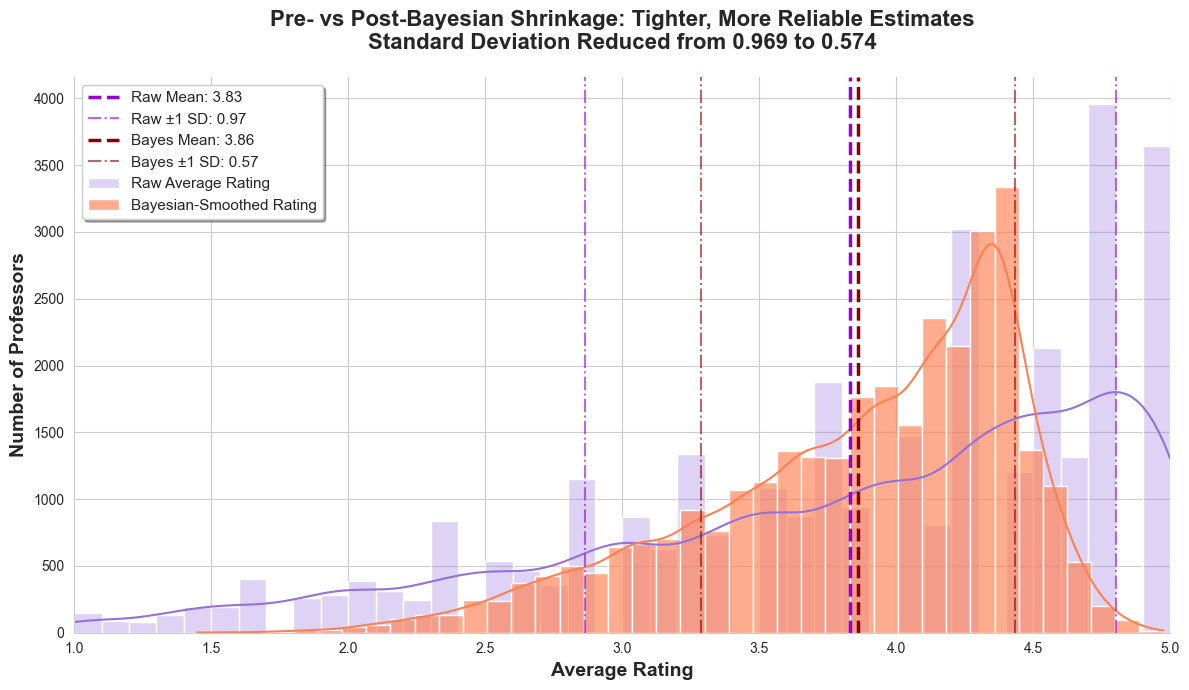

In [23]:
# dont delete. Extract series
raw = filtered_df["Average Rating"]
bayes = filtered_df["AvgRating_Bayes"]

# Compute statistics
raw_mean, raw_median, raw_std = raw.mean(), raw.median(), raw.std()
bayes_mean, bayes_median, bayes_std = bayes.mean(), bayes.median(), bayes.std()

print(f"Raw Median: {raw_median:.2f}")
print(f"Bayesian Median: {bayes_median:.2f}")

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Histograms with KDE (counts, not density)
sns.histplot(raw, bins=40, color='mediumpurple', alpha=0.3, 
             edgecolor='white', linewidth=1, kde=True, 
             label='Raw Average Rating')
sns.histplot(bayes, bins=40, color='coral', alpha=0.65, 
             edgecolor='white', linewidth=1, kde=True,
             label='Bayesian-Smoothed Rating')

# Raw statistics (blue/purple)
plt.axvline(raw_mean, linestyle='--', linewidth=2.5, color='darkviolet', 
            label=f'Raw Mean: {raw_mean:.2f}')
plt.axvline(raw_mean + raw_std, linestyle='-.', linewidth=1.5, color='darkviolet', 
            alpha=0.6, label=f'Raw ±1 SD: {raw_std:.2f}')
plt.axvline(raw_mean - raw_std, linestyle='-.', linewidth=1.5, color='darkviolet', alpha=0.6)

# Bayesian statistics (red)
plt.axvline(bayes_mean, linestyle='--', linewidth=2.5, color='darkred', 
            label=f'Bayes Mean: {bayes_mean:.2f}')
plt.axvline(bayes_mean + bayes_std, linestyle='-.', linewidth=1.5, color='darkred', 
            alpha=0.6, label=f'Bayes ±1 SD: {bayes_std:.2f}')
plt.axvline(bayes_mean - bayes_std, linestyle='-.', linewidth=1.5, color='darkred', alpha=0.6)

plt.xlabel('Average Rating', fontsize=14, fontweight='bold')
plt.ylabel('Number of Professors', fontsize=14, fontweight='bold')
plt.title('Pre- vs Post-Bayesian Shrinkage: Tighter, More Reliable Estimates\n' +
          f'Standard Deviation Reduced from {raw_std:.3f} to {bayes_std:.3f}',
          fontsize=16, fontweight='bold', pad=20)
plt.xlim(1, 5)
plt.legend(fontsize=11, frameon=True, shadow=True)
sns.despine()
plt.tight_layout()
plt.show()

## 2.8. What Bayesian Shrinkage Accomplished

Note: Bayesian shrinkage was performed for profs who have atleast 3 reviews (median split by number of reviews) so as to be able to retain atelast half the data. So the profs analysed hence forth have reicevd aleast 3 reviews + adjusted with bayesian parameter.

![PostBayes](../images/PostBayes.png)


The adjustment pulled extreme ratings toward the global mean, creating more conservative and reliable estimates:

-**Central Tendency:**

The **median** dropped slightly from 4.10 to 3.99, tempering the optimistic skew, i.e, in case there was any survivorship bias towards popular or tenured profs at all, this new median would adjust for that.

The **mean** increased from 3.83 to 3.86, as low-sample outliers were regularized

-**Variance Reduction (The Key Win):**

Standard deviation decreased from 0.969 to 0.574 - a 41% reduction
This tighter distribution means ratings are now more stable and trustworthy


**What This Means**

Professors with tiny sample sizes (1-3 ratings) who previously had extreme scores (1.0 or 5.0) are now pulled toward the population average (~3.9). We're no longer treating a single student's opinion as gospel truth.



**The trade-off** 

We've sacrificed some "extreme" ratings for reliability. A professor with one 5-star review no longer appears perfect - but that's the point. With limited data, we should be skeptical, not certain.
Bayesian shrinkage doesn't tell us who the best professors are - it tells us who we can trust the ratings for. And that's far more valuable for decision-making.

# Chapters 3: Non Parametric Hypothesis Testing

## 3.1. Objective, Ho, and Ha

The next leg of the project asked us to investigate if there was significant differece in the average rating for male and female professors. More specifically, are male professors rated significantly higher than female professors? This gives us our Null and Alternate Hypothesis:

**Ho** : *Male professors on RMP ARE NOT rated significanlty higher than female professors*

**Ha** : *Male professors on RMP ARE rated significanlty higher than female professors*



## 3.2. Preparing the dataset

Following the Bayesian shrinkage in Chp2, the latest dataframe (31,951 rows) includes all the variables required for this test, mainly - Baye's Adjusted Average Ratings and count of Male and Female professors.

However, a quick loook at the data, reveals that gender was not reported for all professors. While it was necessary to include these rows in the overall analysis of average ratings data in chp2 (we do not want to loose information about ratings when demographic information is not required), for this particular case, it was required that the analysis be performed only for records with known values for professor's gender.

Therefore, rows with unknown gender were dropped and this part of the analysis was performed on *23,281 records - Male (0): 53.53% and Female (1): 46.47%*

In [24]:
#drop missing gender data, retain rows where male and female values are not equal
filtered_df = filtered_df[filtered_df['Male'] != filtered_df['Female']]
filtered_df.shape

(23281, 30)

In [25]:
#create a new feature Gender 1 = female, 0 = male
filtered_df['Gender'] = filtered_df['Female']
filtered_df.head()

,Average Rating,Average Difficulty,Number of ratings,Hot or Not,Take class again,Online class ratings,Male,Female,Tough grader,Good feedback,...,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy,AvgRating_Bayes,AvgDifficulty_Bayes,Gender
0,3.2,3.0,4.0,0.0,NaN,0.0,1,0,2,1,...,0,0,0,0,0,0,0,3.582407,2.964181,0
2,3.5,3.3,22.0,0.0,56.0,7.0,1,0,8,13,...,0,0,0,3,0,1,3,3.571913,3.232505,0
4,2.6,4.1,10.0,0.0,NaN,0.0,1,0,4,3,...,0,0,1,1,0,5,1,3.029444,3.711842,0
5,4.3,3.3,16.0,1.0,83.0,0.0,0,1,6,5,...,0,0,2,10,0,0,1,4.201984,3.213220,1
7,4.1,1.8,8.0,0.0,NaN,0.0,0,1,0,3,...,0,0,0,2,0,0,0,4.018590,2.236741,1


In [26]:
# Count of male and female
gender_counts = filtered_df['Gender'].value_counts()

# Percentages
gender_percentages = filtered_df['Gender'].value_counts(normalize=True) * 100

print("Count:")
print(f"Male (0): {gender_counts.get(0, 0)}")
print(f"Female (1): {gender_counts.get(1, 0)}")
print(f"\nPercentage:")
print(f"Male (0): {gender_percentages.get(0, 0):.2f}%")
print(f"Female (1): {gender_percentages.get(1, 0):.2f}%")

Count:
Male (0): 12463
Female (1): 10818

Percentage:
Male (0): 53.53%
Female (1): 46.47%


## 3.3. Choosing an appropriate statistical test

- **Parametric vs Non parametric tests** Box plots of the average ratings for male and female professors show that the data is **not normally distributed** for either group, following in the footsteps of the original average ratings distribution seen in Chapter 2 (notable skew and mean not equal to median). 

![MandFBoxPlot](../images/MFBox.png)


Regardless of the skew, our large sample size (n = 12463 M and 10818 F) could have easily generated relibale estimates of sample means for both groups to satisfy the Central Limit Theorem and justify parametric tests (CLT: with a large sample size, the sampling distribution of means approaches a normal distribution regardless of the underlyig distribution - the skew in our case).


However, using a **parametric test would involve comparing means of average ratings** of two groups— a statistically and conceptually questionable approach. For instance, how does one even interpret the mean of means or average of averages?


**Rating scales are inherently ordinal and subject to ceiling effects and psychological biases in how respondents use the scale.** These characteristics **render the mean a less appropriate summary statistic** for groups. 


The **median, which non-parametric tests utilize, provides a more robust and interpretable measure of central tendency for rating data**, as it is less sensitive to extreme values and better captures the typical rating experience.


To sum it sum, non-normality of the data was no reason to opt out of parametric tests. In fact, given our large sample size for both groups, CLT would statistically permit the use of a t-test. However, the ordinal nature of ratings and interpretibility of median of average ratings (as opposed to mean of averages) makes non-parametric tests more phillosophically suitable for this analysis.


Section 3.4 discusses the results obtained after comparing the medians using the Mann Whitney U test and distributions using Kolmogorov-Smirnov test.

## 3.4. Results of the non-parametric tests

**Distribution and Central Tendency Comparisons**

Let's start by noting down some observed parameters and statistics:

- **Sample sizes:**

  Male (0)- 12463
  
  Female (1)- 10818


- **Group Medians:**

  Male (0)- 4.0583
  
  Female (1)- 4.0038

- *Observed median difference (Male - Female): 0.0545*

- **Spread:**

   Male (0)- Variance: 0.3099, Standard Deviation: 0.5567

   Female (1)- Variance: 0.3271, Standard Deviation: 0.5720

   Variance Ratio (Male/Female): 0.9472


The median comparison tells us that 50% of males scored above 4.0583 and 50% of females scored above 4.0038.

The **gap between these two "middle points" of both groups is 0.0545**, i.e., *The typical (or median) male professor (the one at the 50th percentile), is rated 0.0545 points higher than the median female professor or Male professors' median rating exceeds female professors' median rating by 0.0545 points.*

Now the **question - is this difference merely due to chance**, i.e, its typically expected, or is there a deeper, significant systemic process at play by virtue of which median avearge ratings for male professors is higher than that of female professors?

- To answer this, I first conducted a **two-sample Kolmogorov-Smirnov** test to determine whether the overall distributions of ratings differ between male and female professors.  This test examines the entire empirical cumulative distribution functions (ECDFs) rather than focusing solely on a single parameter like the median. Here are the results of the KS test at *0.005 level* of significance:
 KS-statistic: 0.031459
 **p-value: 0.000021 (< 0.005) => indicates significant difference in the distribution** of average ratings for male vs female profs.
 
- I also performed a **one-tailed Mann-Whitney U test** to examine specifically if male professors receive higher median ratings than female professors. The result was **statistically significant (U = 69,948,221.50, p < 0.001, α = 0.005)**. 

- Interpreting the U statistic: The dataset for this analysis consisted of ~12,461 males and ~10,820 females. The MWU test evaluates all possible pairwise comparisons = 12,461 × 10,820 = 134,829,220, and tells us in how many of these the male professor had a higher rating. Thus, the statistic (U = 69,948,221.50) highlights that of all ~135 million possible pairs (one male, one female), in about 70 million of them, the male professor had a higher rating.

### So, given all that statistically significant evidence we have gathered above, can we conclude that male professors on RMP are, in fact, rated significantly higher than female professors?...



## 3.5. Addressing Sample Size Concerns
Now here's where we need to pump the brakes a bit. 

With our **massive sample size of 23,281 records** (53.53% male, 46.47% female), we have to **be careful about what "statistically significant" actually means**. When you have this many observations, even tiny, practically meaningless differences can show up as statistically significant. The **large sample inflates the U-statistic**, making it easier to get a **small p-value**. So **just because something is statistically detectable doesn't mean it matters in the real world**. 

Supporting this concern, our variance analysis shows the **variance ratio between groups is 0.95** —the spreads are nearly identical, suggesting these distributions look quite similar overall (even though the tests say theyre are statistically significantly different! ).

 - **KEY TAKEAWAY** This is probably the bit that both amazes and (slightly) annoys me about the classic null hypothesis testing framework. First, we need a large sample size to have confidence that our sample statistics reliably estimate the true population parameters. For parametric tests, this allows us to leverage the Central Limit Theorem (to comapare differences in means); for non-parametric tests like the Mann-Whitney U (which we used here), large samples ensure our rank-based estimates are stable and representative. **Large samples increase statistical Power**- our ability to detect real effects when they exist. This increased power is **generally beneficial: ***if*** there's a meaningful difference**, we want to find it. But here's the **irony and the trade-off: as n gets sufficiently large, power becomes so high that we also detect trivial, practically meaningless differences** as statistically significant! The test becomes hypersensitive— picking up on noise and treating it as signal. With enough data, statistical significance becomes almost guaranteed, even for differences that don't matter in the real world.

 ### "As n gets sufficiently large, power becomes so high that we also detect trivial, practically meaningless differences as statistically significant!"


## 3.6. Contxtualising Significance: Effect Size and Confidence Interval
The risk of inflated test statistics make Effect Sizes and Confidence Intervals critical for interpreting what significance actually means, i.e., they help us distinguish between what is "statistically detectable" and what is "practicallly relevant/ important."

-**Effect Size:** 
 For our case, I calculated the **rank-biserial correlation** (non parametric version of Cohen's d for the MWU test) as the effect size. The result **(r = 0.0376) is very small** —it doesn't even hit the 0.1, the threshold for what we'd call a "small" effect. 

   **To put the 0.0545-point difference in perspective**, on a typical 5-point rating scale, the usable range for differences in medians is 4 points (from 1 to 5). So 0.0545 ÷ 4 = 0.0136, or about 1.4% of the scale. Both groups are sitting right around 4 out of 5—essentially getting similarly positive evaluations. Yes, males are rated a bit higher, but we're talking about a difference you'd barely notice.

-**Confidence Interval:**
 While the **effect size helps us characterize the magnitude of the effect, it doesn't tell us how precise our estimate is** or what range of values would be consistent with our data across repeated samples. 

 I performed bootstrapping (10,000 iterations) to construct a 95% confidence interval for the median difference. The interval **[0.0252, 0.0760]** means that **if we repeated this study 100 times, approximately 95 of those intervals would contain the true median difference**. Honestly, that's not absolute certainty—we could theoretically be in that unlucky 5% of samples where our interval missed the true value. If the true median difference were actually zero, there's a small chance our sample happened to skew positive. 
 
 However, the interval is **entirely positive** and bounded **well away from zero (where zero indicates there is NO difference in medians between both the groups)**, which makes it unlikely we're in that 5%. The interval is also quite narrow (over 10K intereations!), indicating our estimate is precise—if we repeated this study, we'd consistently get median differences in this small range. Even at the upper bound (0.076 points), we're still looking at less than 2% of the rating scale—hardly a game-changer.

### Bottom Line?
Yes, male professors get statistically significantly higher ratings than female professors. But practically speaking, this difference is tiny. The effect size is very small (r = 0.0376), and we're talking about a 0.05-point gap on a 5-point scale. The confidence interval confirms this difference is real and consistently small across hypothetical replications. Both groups are rated around 4.0/5.0, which means gender really doesn't seem to have much meaningful impact on how students evaluate their professors in this dataset.

/var/folders/s3/mby87d114_g07sh3cl6ysz2r0000gn/T/ipykernel_4795/468283768.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male (0)', 'Female (1)'])


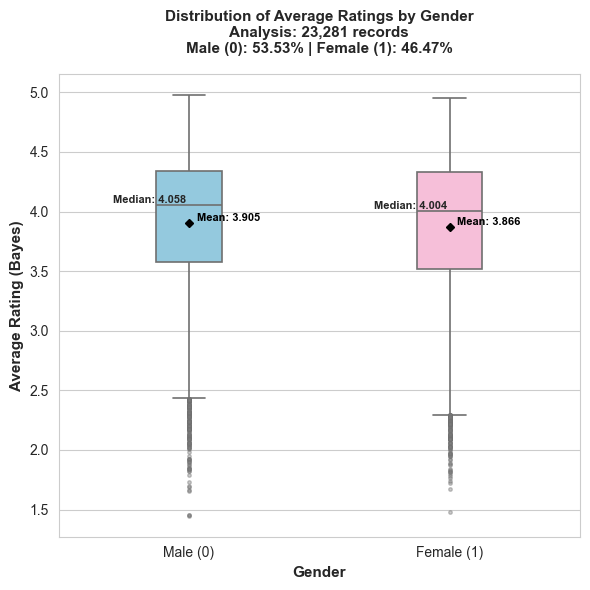

In [27]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))

# Create boxplot with thinner boxes and nicer colors
ax = sns.boxplot(data=filtered_df, x='Gender', y='AvgRating_Bayes', 
                 hue='Gender',
                 palette={0: '#87CEEB', 1: '#FFB6D9'},  # Sky blue and softer pink
                 width=0.25,  # Much thinner boxes
                 linewidth=1.2,
                 flierprops=dict(marker='o', markerfacecolor='gray', markersize=2.5, alpha=0.4),
                 legend=False,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='black', markersize=4, markeredgecolor='black'))

# Customize
ax.set_xticklabels(['Male (0)', 'Female (1)'])
ax.set_xlabel('Gender', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Rating (Bayes)', fontsize=11, fontweight='bold')
ax.set_title('Distribution of Average Ratings by Gender\nAnalysis: 23,281 records\nMale (0): 53.53% | Female (1): 46.47%', 
             fontsize=11, fontweight='bold', pad=15)

# Add median and mean values as text
medians = filtered_df.groupby('Gender')['AvgRating_Bayes'].median()
means = filtered_df.groupby('Gender')['AvgRating_Bayes'].mean()

for i, gender in enumerate([0, 1]):
    ax.text(i-0.15, medians[gender], f'Median: {medians[gender]:.3f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=8)
    ax.text(i+0.15, means[gender], f'Mean: {means[gender]:.3f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=8, color='black')

plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import mannwhitneyu

# Separate data by gender
male_ratings = filtered_df[filtered_df['Gender'] == 0]['AvgRating_Bayes']
female_ratings = filtered_df[filtered_df['Gender'] == 1]['AvgRating_Bayes']

# Perform one-tailed Mann-Whitney U test
# alternative='greater' tests if male ratings are significantly higher than female ratings
statistic, p_value = mannwhitneyu(male_ratings, female_ratings, alternative='greater')

# Calculate medians
male_median = male_ratings.median()
female_median = female_ratings.median()

# Display results
alpha = 0.005
print("=" * 70)
print("Mann-Whitney U Test: One-Tailed (Male > Female)")
print("=" * 70)
print(f"Sample sizes:")
print(f"  Male (0): {len(male_ratings)}")
print(f"  Female (1): {len(female_ratings)}")
print(f"\nMedians:")
print(f"  Male (0): {male_median:.4f}")
print(f"  Female (1): {female_median:.4f}")
print(f"  Difference: {male_median - female_median:.4f}")
print(f"\nTest Statistics:")
print(f"  U-statistic: {statistic:.2f}")
print(f"  p-value: {p_value:.6f}")
print(f"  Alpha level: {alpha}")
print(f"\nConclusion:")
if p_value < alpha:
    print(f"  ✓ REJECT the null hypothesis (p = {p_value:.6f} < {alpha})")
    print(f"  Male professors have significantly higher median ratings than female professors.")
else:
    print(f"  ✗ FAIL TO REJECT the null hypothesis (p = {p_value:.6f} >= {alpha})")
    print(f"  No significant evidence that male professors have higher median ratings.")
print("=" * 70)

Mann-Whitney U Test: One-Tailed (Male > Female)
Sample sizes:
  Male (0): 12463
  Female (1): 10818

Medians:
  Male (0): 4.0583
  Female (1): 4.0038
  Difference: 0.0545

Test Statistics:
  U-statistic: 69948221.50
  p-value: 0.000000
  Alpha level: 0.005

Conclusion:
  ✓ REJECT the null hypothesis (p = 0.000000 < 0.005)
  Male professors have significantly higher median ratings than female professors.


Kolmogorov-Smirnov Test: Two-Sample
Sample sizes:
  Male (0): 12463
  Female (1): 10818

Test Statistics:
  KS-statistic: 0.031459
  p-value: 0.000021
  Alpha level: 0.005

Conclusion:
  ✓ REJECT the null hypothesis (p = 0.000021 < 0.005)
  The distributions of ratings differ significantly between genders.


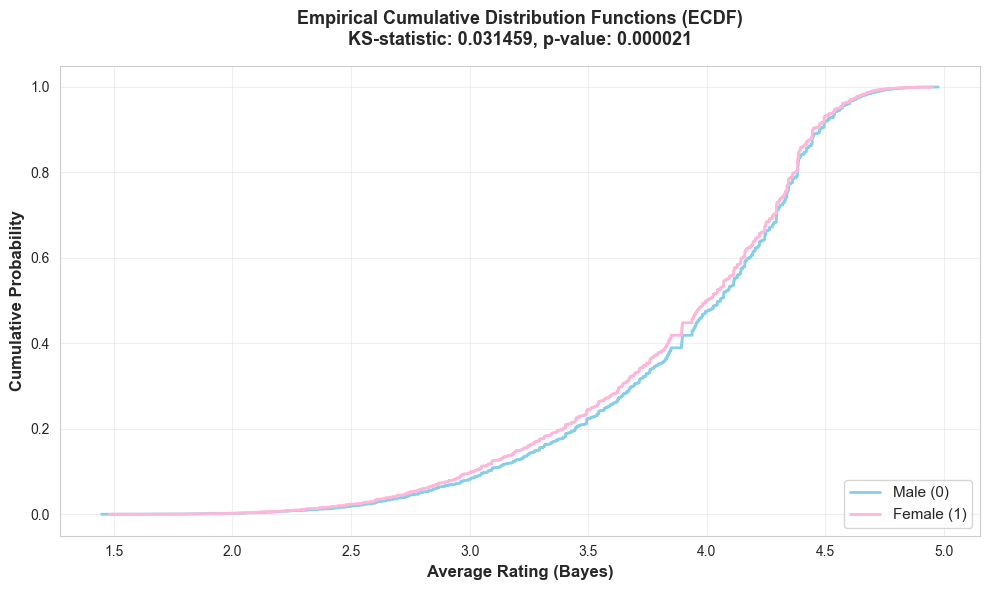

In [29]:
from scipy.stats import ks_2samp
import numpy as np

# Separate data by gender
male_ratings = filtered_df[filtered_df['Gender'] == 0]['AvgRating_Bayes']
female_ratings = filtered_df[filtered_df['Gender'] == 1]['AvgRating_Bayes']

# Perform two-sample Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(male_ratings, female_ratings)

# Display results
alpha = 0.005
print("=" * 70)
print("Kolmogorov-Smirnov Test: Two-Sample")
print("=" * 70)
print(f"Sample sizes:")
print(f"  Male (0): {len(male_ratings)}")
print(f"  Female (1): {len(female_ratings)}")
print(f"\nTest Statistics:")
print(f"  KS-statistic: {statistic:.6f}")
print(f"  p-value: {p_value:.6f}")
print(f"  Alpha level: {alpha}")
print(f"\nConclusion:")
if p_value < alpha:
    print(f"  ✓ REJECT the null hypothesis (p = {p_value:.6f} < {alpha})")
    print(f"  The distributions of ratings differ significantly between genders.")
else:
    print(f"  ✗ FAIL TO REJECT the null hypothesis (p = {p_value:.6f} >= {alpha})")
    print(f"  No significant evidence that the distributions differ.")
print("=" * 70)

# Plot ECDFs
plt.figure(figsize=(10, 6))

# Sort data for ECDF
male_sorted = np.sort(male_ratings)
female_sorted = np.sort(female_ratings)

# Calculate ECDF
male_ecdf = np.arange(1, len(male_sorted) + 1) / len(male_sorted)
female_ecdf = np.arange(1, len(female_sorted) + 1) / len(female_sorted)

# Plot
plt.step(male_sorted, male_ecdf, where='post', label='Male (0)', color='#87CEEB', linewidth=2)
plt.step(female_sorted, female_ecdf, where='post', label='Female (1)', color='#FFB6D9', linewidth=2)

# Customize
plt.xlabel('Average Rating (Bayes)', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
plt.title(f'Empirical Cumulative Distribution Functions (ECDF)\nKS-statistic: {statistic:.6f}, p-value: {p_value:.6f}', 
          fontsize=13, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import levene

# Separate data by gender
male_ratings = filtered_df[filtered_df['Gender'] == 0]['AvgRating_Bayes'].values
female_ratings = filtered_df[filtered_df['Gender'] == 1]['AvgRating_Bayes'].values

# ===================================================================
# DESCRIPTIVE STATISTICS: VARIANCE COMPARISON
# ===================================================================

# Calculate variances and standard deviations
male_var = np.var(male_ratings, ddof=1)
female_var = np.var(female_ratings, ddof=1)
male_std = np.std(male_ratings, ddof=1)
female_std = np.std(female_ratings, ddof=1)

# Levene's test for equality of variances
levene_stat, levene_p = levene(male_ratings, female_ratings)

print("=" * 70)
print("DESCRIPTIVE STATISTICS: VARIANCE AND SPREAD")
print("=" * 70)
print(f"\nMale (0):")
print(f"  Variance: {male_var:.4f}")
print(f"  Standard Deviation: {male_std:.4f}")

print(f"\nFemale (1):")
print(f"  Variance: {female_var:.4f}")
print(f"  Standard Deviation: {female_std:.4f}")

print(f"\nVariance Ratio (Male/Female): {male_var/female_var:.4f}")

print("\n" + "=" * 70)
print("LEVENE'S TEST FOR EQUALITY OF VARIANCES")
print("=" * 70)
print(f"Test statistic: {levene_stat:.4f}")
print(f"p-value: {levene_p:.6f}")
print(f"\nConclusion:")
if levene_p < 0.05:
    print(f"  ✓ REJECT null hypothesis (p = {levene_p:.6f} < 0.05)")
    print(f"  The variances differ significantly between groups.")
else:
    print(f"  ✗ FAIL TO REJECT null hypothesis (p = {levene_p:.6f} >= 0.05)")
    print(f"  No significant difference in variances between groups.")
print("=" * 70)

DESCRIPTIVE STATISTICS: VARIANCE AND SPREAD

Male (0):
  Variance: 0.3099
  Standard Deviation: 0.5567

Female (1):
  Variance: 0.3271
  Standard Deviation: 0.5720

Variance Ratio (Male/Female): 0.9472

LEVENE'S TEST FOR EQUALITY OF VARIANCES
Test statistic: 12.0676
p-value: 0.000514

Conclusion:
  ✓ REJECT null hypothesis (p = 0.000514 < 0.05)
  The variances differ significantly between groups.


In [31]:


# Separate data by gender
male_ratings = filtered_df[filtered_df['Gender'] == 0]['AvgRating_Bayes'].values
female_ratings = filtered_df[filtered_df['Gender'] == 1]['AvgRating_Bayes'].values

# ===================================================================
# 1. EFFECT SIZE: Rank-Biserial Correlation
# ===================================================================

n1, n2 = len(male_ratings), len(female_ratings)
U1, _ = mannwhitneyu(male_ratings, female_ratings, alternative='greater')

# Correct formula: r = (U1 - U2) / (n1 * n2)
# Where U2 = n1*n2 - U1
U2 = n1 * n2 - U1
r_effect = (U1 - U2) / (n1 * n2)

# Alternative simpler formula: r = 2*U1/(n1*n2) - 1
# r_effect = (2 * U1) / (n1 * n2) - 1

print("=" * 70)
print("EFFECT SIZE: Rank-Biserial Correlation")
print("=" * 70)
print(f"Rank-biserial correlation (r): {r_effect:.4f}")
print(f"\nInterpretation: Small: 0.1 | Medium: 0.3 | Large: 0.5")
print(f"Positive r means males have higher ratings")
print("=" * 70)

# ===================================================================
# 2. BOOTSTRAP 95% CI FOR MEDIAN DIFFERENCE
# ===================================================================

# Observed median difference
observed_median_diff = np.median(male_ratings) - np.median(female_ratings)


# Bootstrap
np.random.seed(42)
n_bootstrap = 10000
diffs = []

for _ in range(n_bootstrap):
    sample_male = np.random.choice(male_ratings, size=len(male_ratings), replace=True)
    sample_female = np.random.choice(female_ratings, size=len(female_ratings), replace=True)
    diff = np.median(sample_male) - np.median(sample_female)
    diffs.append(diff)

# Calculate 95% CI
ci_lower = np.percentile(diffs, 2.5)
ci_upper = np.percentile(diffs, 97.5)

print("\n" + "=" * 70)
print("BOOTSTRAP 95% CONFIDENCE INTERVAL FOR MEDIAN DIFFERENCE")
print("=" * 70)
print(f"Observed median difference (Male - Female): {observed_median_diff:.4f}")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
print("=" * 70)

EFFECT SIZE: Rank-Biserial Correlation
Rank-biserial correlation (r): 0.0376

Interpretation: Small: 0.1 | Medium: 0.3 | Large: 0.5
Positive r means males have higher ratings

BOOTSTRAP 95% CONFIDENCE INTERVAL FOR MEDIAN DIFFERENCE
Observed median difference (Male - Female): 0.0545
95% CI: [0.0252, 0.0760]


In [32]:
print(filtered_df.shape)
filtered_df.head()


(23281, 31)


,Average Rating,Average Difficulty,Number of ratings,Hot or Not,Take class again,Online class ratings,Male,Female,Tough grader,Good feedback,...,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy,AvgRating_Bayes,AvgDifficulty_Bayes,Gender
0,3.2,3.0,4.0,0.0,NaN,0.0,1,0,2,1,...,0,0,0,0,0,0,0,3.582407,2.964181,0
2,3.5,3.3,22.0,0.0,56.0,7.0,1,0,8,13,...,0,0,0,3,0,1,3,3.571913,3.232505,0
4,2.6,4.1,10.0,0.0,NaN,0.0,1,0,4,3,...,0,0,1,1,0,5,1,3.029444,3.711842,0
5,4.3,3.3,16.0,1.0,83.0,0.0,0,1,6,5,...,0,0,2,10,0,0,1,4.201984,3.213220,1
7,4.1,1.8,8.0,0.0,NaN,0.0,0,1,0,3,...,0,0,0,2,0,0,0,4.018590,2.236741,1


In [33]:
print(filtered_df.columns.tolist())

['Average Rating', 'Average Difficulty', 'Number of ratings', 'Hot or Not', 'Take class again', 'Online class ratings', 'Male', 'Female', 'Tough grader', 'Good feedback', 'Respected', 'Lots to read', 'Participation matters', 'Don’t skip class or you will not pass', 'Lots of homework', 'Inspirational', 'Pop quizzes!', 'Accessible', 'So many papers', 'Clear grading', 'Hilarious', 'Test heavy', 'Graded by few things', 'Amazing lectures', 'Caring', 'Extra credit', 'Group projects', 'Lecture heavy', 'AvgRating_Bayes', 'AvgDifficulty_Bayes', 'Gender']


# Chapter 4: Linear Rgression


## 4.1. Objective and Data Prep

In [34]:


# List of tag columns - using exact names from your dataframe
tag_columns = [
    'Tough grader',
    'Good feedback',
    'Respected',
    'Lots to read',
    'Participation matters',
    "Don’t skip class or you will not pass",
    'Lots of homework',
    'Inspirational',
    'Pop quizzes!',
    'Accessible',
    'So many papers',
    'Clear grading',
    'Hilarious',
    'Test heavy',
    'Graded by few things',
    'Amazing lectures',
    'Caring',
    'Extra credit',
    'Group projects',
    'Lecture heavy'
]

# First, let's check what values are currently in these columns
print("Sample of current tag data:")
display(filtered_df[tag_columns].head(15))





Sample of current tag data:


,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don’t skip class or you will not pass,Lots of homework,Inspirational,Pop quizzes!,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3
4,4,3,0,0,2,0,1,1,0,0,0,0,0,0,0,1,1,0,5,1
5,6,5,4,1,1,0,0,7,1,3,0,0,1,0,0,2,10,0,0,1
7,0,3,2,2,1,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0
9,0,1,2,2,2,2,1,2,3,0,1,0,0,0,0,0,5,6,0,4
10,4,0,0,6,1,4,1,0,5,0,0,1,0,2,1,2,1,0,0,0
11,5,2,3,13,1,6,10,0,0,0,1,0,1,0,0,5,1,3,2,2
12,2,4,1,0,0,2,0,0,0,0,0,1,2,0,0,0,4,0,0,0
13,0,1,0,7,4,3,3,7,0,0,0,6,5,0,2,11,1,2,0,2


In [35]:
for col in tag_columns:
    print(filtered_df[col].max())

112
171
107
82
82
110
141
119
97
63
64
66
224
81
39
136
99
128
92
38


In [36]:
# Convert tag columns to binary with new column names
binary_tag_columns = []

for col in tag_columns:
    if col in filtered_df.columns:
        new_col_name = f"{col}_Binary"
        filtered_df[new_col_name] = (filtered_df[col] > 0).astype(int)
        binary_tag_columns.append(new_col_name)
    else:
        print(f"Warning: Column '{col}' not found")

# Verify the conversion
print("\nBinary tag columns created:")
display(filtered_df[binary_tag_columns].head())
print("\nValue counts for first binary tag:")
print(filtered_df[binary_tag_columns[0]].value_counts())


Binary tag columns created:


,Tough grader_Binary,Good feedback_Binary,Respected_Binary,Lots to read_Binary,Participation matters_Binary,Don’t skip class or you will not pass_Binary,Lots of homework_Binary,Inspirational_Binary,Pop quizzes!_Binary,Accessible_Binary,So many papers_Binary,Clear grading_Binary,Hilarious_Binary,Test heavy_Binary,Graded by few things_Binary,Amazing lectures_Binary,Caring_Binary,Extra credit_Binary,Group projects_Binary,Lecture heavy_Binary
0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0,1,0,1,1
4,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,1
5,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1
7,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0



Value counts for first binary tag:
Tough grader_Binary
1    12844
0    10437
Name: count, dtype: int64


In [37]:
for col in binary_tag_columns:
    print(filtered_df[col].max())
    



1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


## 4.2. Pre-regression EDA

We first examined the distribution of tags across our dataset of 23,281 professors. The proportion analysis revealed which behavioral characteristics students most frequently assign to their professors, providing context for the prevalence of each tag in our sample.
To explore whether these tags are associated with differences in ratings, we compared median ratings for professors with and without each tag. We focused on the top three tags (Good feedback, Caring, Participation matters) and bottom three tags (Test heavy, So many papers, Pop quizzes!) that showed the most notable patterns in our initial analysis.




/var/folders/s3/mby87d114_g07sh3cl6ysz2r0000gn/T/ipykernel_4795/2636173172.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


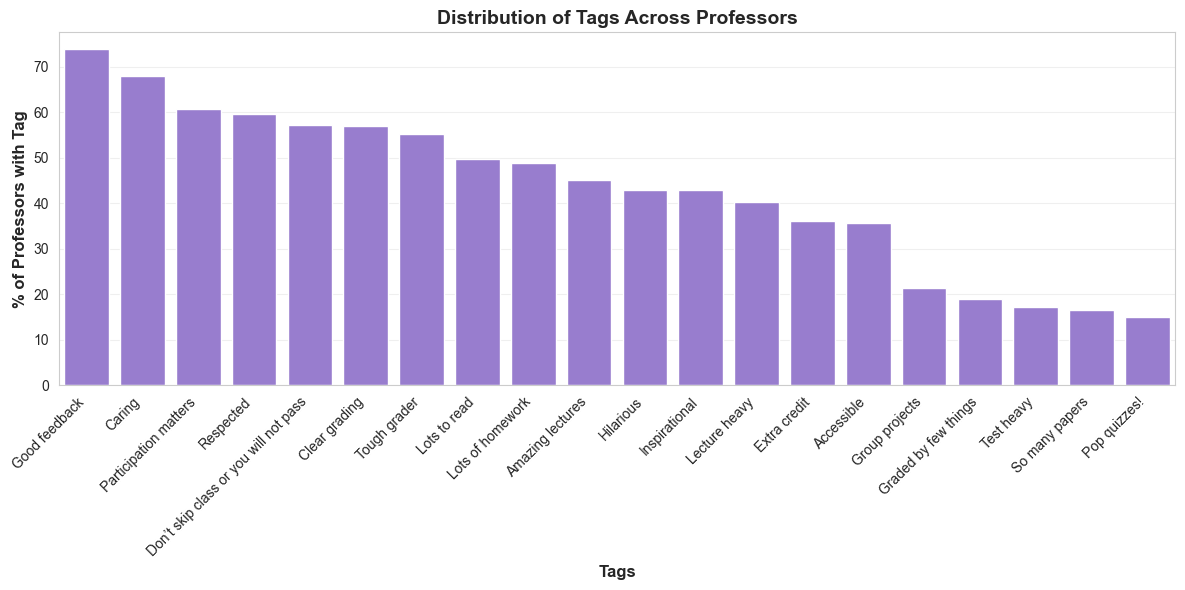

,Tag,Proportion
1,Good feedback,73.922941
16,Caring,68.089859
4,Participation matters,60.804948
2,Respected,59.765474
5,Don’t skip class or you will not pass,57.244105
11,Clear grading,56.921954
0,Tough grader,55.169451
3,Lots to read,49.787380
6,Lots of homework,48.941197
15,Amazing lectures,45.058202


In [38]:


# Calculate proportion of professors with each tag
proportions = []

for col in binary_tag_columns:
    prop = (filtered_df[col] == 1).sum() / len(filtered_df) * 100
    tag_name = col.replace('_Binary', '')
    proportions.append({'Tag': tag_name, 'Proportion': prop})

# Create dataframe
prop_df = pd.DataFrame(proportions)
prop_df = prop_df.sort_values('Proportion', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=prop_df, x='Tag', y='Proportion', 
            color='mediumpurple', ax=ax)

ax.set_ylabel('% of Professors with Tag', fontsize=12, fontweight='bold')
ax.set_xlabel('Tags', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Tags Across Professors', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Show the data
display(prop_df)

The median comparison with 95% confidence intervals reveals a clear story: **none of the error bars overlap** between "with tag" and "without tag" groups for any of the six tags examined. This provides **strong evidence that all of these tags are potentially associated with differences in professor ratings**, not just artifacts of sampling variability.


Notably, the **top three tags (Good feedback, Caring, Participation matters) show professors with these tags consistently receiving higher median ratings** than those without. Conversely, the **bottom three tags (Test heavy, So many papers, Pop quizzes!) show the opposite pattern**—professors with these tags receive lower median ratings. The non-overlapping confidence intervals give us confidence that these associations are real and systematic.


These findings set the stage for our regression analysis, where we'll examine how these tags predict ratings while controlling for their simultaneous effects. The strong individual associations observed here suggest these behavioral characteristics are meaningful predictors worth including in our model.

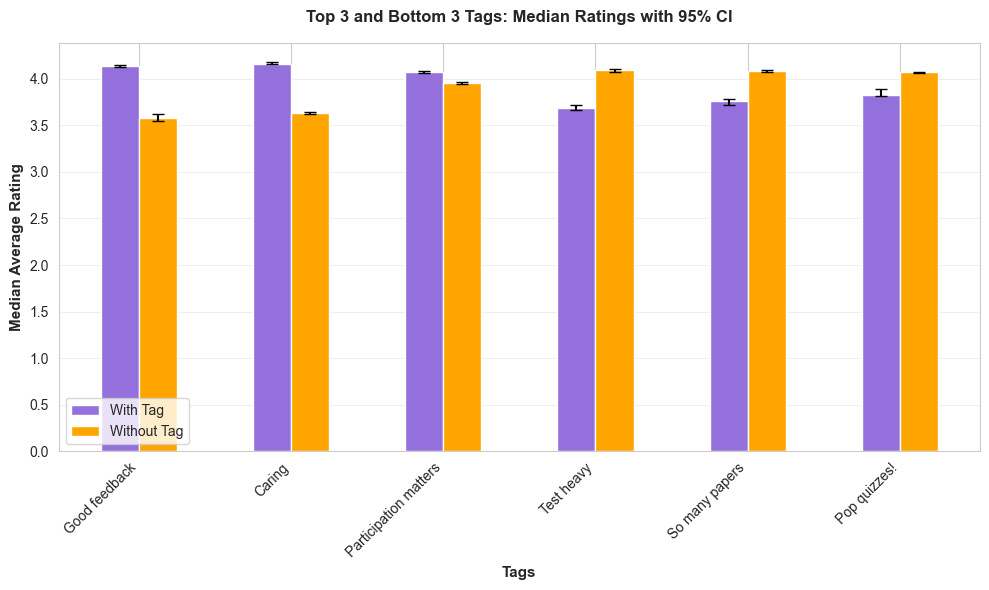

,Tag,With Tag,Without Tag,With_Error_Lower,With_Error_Upper,Without_Error_Lower,Without_Error_Upper
0,Good feedback,4.141666,3.582407,0.013194,0.002500,0.037268,0.039562
1,Caring,4.162778,3.629444,0.002593,0.014306,0.007475,0.019915
2,Participation matters,4.071296,3.953472,0.003396,0.011712,0.009306,0.013685
3,Test heavy,3.690104,4.094166,0.024574,0.030035,0.019979,0.014167
4,So many papers,3.758854,4.080128,0.038715,0.019618,0.008832,0.014038
5,Pop quizzes!,3.831547,4.070139,0.012365,0.061971,0.011806,0.001157


In [39]:

# Define top 3 and bottom 3 tags
selected_tags = [
    'Good feedback_Binary',
    'Caring_Binary', 
    'Participation matters_Binary',
    'Test heavy_Binary',
    'So many papers_Binary',
    'Pop quizzes!_Binary'
]

# Bootstrap function for CI
def bootstrap_ci_median(data, n_bootstrap=10000):
    np.random.seed(42)
    medians = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(sample))
    
    ci_lower = np.percentile(medians, 2.5)
    ci_upper = np.percentile(medians, 97.5)
    return ci_lower, ci_upper

# Calculate medians and CIs for each tag
results = []

for col in selected_tags:
    # With tag
    with_data = filtered_df[filtered_df[col] == 1]['AvgRating_Bayes'].values
    median_with = np.median(with_data)
    ci_with_lower, ci_with_upper = bootstrap_ci_median(with_data)
    
    # Without tag
    without_data = filtered_df[filtered_df[col] == 0]['AvgRating_Bayes'].values
    median_without = np.median(without_data)
    ci_without_lower, ci_without_upper = bootstrap_ci_median(without_data)
    
    tag_name = col.replace('_Binary', '')
    results.append({
        'Tag': tag_name,
        'With Tag': median_with,
        'Without Tag': median_without,
        'With_Error_Lower': median_with - ci_with_lower,
        'With_Error_Upper': ci_with_upper - median_with,
        'Without_Error_Lower': median_without - ci_without_lower,
        'Without_Error_Upper': ci_without_upper - median_without
    })

# Create dataframe
plot_df = pd.DataFrame(results)

# Plot
x = np.arange(len(plot_df))
width = 0.25  # Thinner bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, plot_df['With Tag'], width, 
               label='With Tag', color='mediumpurple')
bars2 = ax.bar(x + width/2, plot_df['Without Tag'], width, 
               label='Without Tag', color='orange')

# Add error bars
ax.errorbar(x - width/2, plot_df['With Tag'],
            yerr=[plot_df['With_Error_Lower'], plot_df['With_Error_Upper']],
            fmt='none', color='black', capsize=4, linewidth=1.5)

ax.errorbar(x + width/2, plot_df['Without Tag'],
            yerr=[plot_df['Without_Error_Lower'], plot_df['Without_Error_Upper']],
            fmt='none', color='black', capsize=4, linewidth=1.5)

# Customize
ax.set_ylabel('Median Average Rating', fontsize=11, fontweight='bold')
ax.set_xlabel('Tags', fontsize=11, fontweight='bold')
ax.set_title('Top 3 and Bottom 3 Tags: Median Ratings with 95% CI', 
             fontsize=12, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(plot_df['Tag'], rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Show the data
display(plot_df)

## 4.3. Regression Assumptions I

Before building our regression model to predict average ratings from behavioral tags, we address the key assumptions of linear regression. While some assumptions—linearity, independence, and homoscedasticity—require residuals and can only be validated after model fitting, we can assess multicollinearity upfront using Variance Inflation Factor (VIF).


### Multicollinearity Check

Multicollinearity occurs when predictor variables are highly correlated with each other, which can make coefficient estimates unstable and difficult to interpret. This is a particular concern for our tag data, as certain behavioral characteristics may naturally co-occur. For example, professors described as "Caring" might also frequently receive the "Good feedback" tag. We calculate VIF for each tag, where values above 5-10 indicate problematic collinearity that could affect our model's reliability.

•[VIF table/results would go here]

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF for each binary tag column
vif_data = pd.DataFrame()
vif_data['Feature'] = [col.replace('_Binary', '') for col in binary_tag_columns]
vif_data['VIF'] = [variance_inflation_factor(filtered_df[binary_tag_columns].values, i) 
                   for i in range(len(binary_tag_columns))]

# Sort by VIF value
vif_data = vif_data.sort_values('VIF', ascending=False)

print("Variance Inflation Factor (VIF) for Binary Tag Features")
print("=" * 60)
display(vif_data)

print("\nInterpretation:")
print("VIF < 5: Low multicollinearity")
print("VIF 5-10: Moderate multicollinearity")
print("VIF > 10: High multicollinearity (problematic)")

# Flag problematic features
problematic = vif_data[vif_data['VIF'] > 10]
if len(problematic) > 0:
    print(f"\n⚠️ {len(problematic)} features with VIF > 10:")
    display(problematic)
else:
    print("\n✓ No features with problematic multicollinearity (VIF > 10)")

Variance Inflation Factor (VIF) for Binary Tag Features


,Feature,VIF
1,Good feedback,4.140793
16,Caring,3.592911
2,Respected,3.114017
4,Participation matters,2.638342
0,Tough grader,2.626484
5,Don’t skip class or you will not pass,2.586091
11,Clear grading,2.509583
15,Amazing lectures,2.274869
7,Inspirational,2.215087
3,Lots to read,2.147776



Interpretation:
VIF < 5: Low multicollinearity
VIF 5-10: Moderate multicollinearity
VIF > 10: High multicollinearity (problematic)

✓ No features with problematic multicollinearity (VIF > 10)


### Understanding VIF

We calculated the Variance Inflation Factor (VIF) for all 20 binary tag predictors. VIF is defined as:

**VIF = 1 / (1 - R²)**

where R² comes from regressing each predictor against all other predictors. 

Here's what this means - For each tag (say, "Good feedback"), we run a separate regression where:

- Dependent variable: "Good feedback" tag
- Independent variables: All other 19 tags

The R² from this regression tells us how well the other tags can predict/explain this particular tag. **If "Good feedback" can be perfectly predicted from other tags (high R²), then it's redundant—it's not adding new information** because the other predictors already capture what it measures.


How the formula works:

If R² = 0 (tag is completely independent) → VIF = 1/(1-0) = 1 (no inflation, ideal)
If R² = 0.5 (moderately predictable) → VIF = 1/(1-0.5) = 2 (mild inflation)
If R² = 0.9 (highly predictable) → VIF = 1/(1-0.9) = 10 (severe inflation)
If R² → 1 (nearly perfect collinearity) → VIF → ∞ (catastrophic)

- **What "inflation" means:**

 VIF measures how much the **variance of the coefficient estimate is inflated compared to if that predictor were completely uncorrelated with others**. A VIF of 4 means the variance (and thus standard error) of that coefficient is 4 times larger than it would be if there were no collinearity. Higher variance means less precise, less stable coefficient estimates.

- **Why it matters:**

 When **predictors are highly correlated** (high R²), the regression struggles to disentangle their individual effects. **Small changes in the data can lead to large swings in coefficient estimates**. The "dependent" nature means the predictor's effect is confounded with other predictors—we can't confidently attribute variance in ratings to this specific tag versus the correlated tags.

- **Our Results:**

 All VIF values are below 5, with the highest being "Good feedback" (VIF = 4.14). This means even for our most correlated tag, only about 76% of its variance is explained by other tags (R² = 1 - 1/4.14 ≈ 0.76), leaving 24% unique variance. This level of collinearity is manageable and won't destabilize our coefficient estimates. We can proceed confidently with all 20 tags as predictors.

## 4.4. Regularization: Addressing Sparsity and Feature Selection

Our tag data presents two key challenges that make regularization particularly valuable. First, the data is inherently sparse: students can assign a maximum of three tags per professor, meaning most tag variables are zeros for any given professor. Second, with 20 potential predictors and likely multicollinearity among related tags, we risk overfitting and producing unstable coefficient estimates in a standard OLS regression.

Regularization techniques address these issues by adding a penalty term to the loss function, constraining coefficient magnitudes and improving model generalization. The two primary approaches differ in how they apply this penalty:

- **Ridge Regression (L2)** adds the squared magnitude of coefficients as a penalty. This shrinks all coefficients toward zero proportionally but retains all predictors in the model. While Ridge handles multicollinearity effectively by distributing weight among correlated predictors, it doesn't perform feature selection—all 20 tags remain in the final model, even those with minimal predictive value.

- **Lasso Regression (L1)** adds the absolute magnitude of coefficients as a penalty. Critically, this can shrink coefficients exactly to zero, effectively performing automatic feature selection. This property makes Lasso particularly well-suited for sparse data and scenarios where we suspect only a subset of predictors are truly important.

### Our Choice: Lasso
We opt for Lasso regression for three reasons:

- First, given the sparse nature of our tag data, we expect that not all 20 tags will be equally predictive—some may rarely be assigned or may not meaningfully differentiate professor quality. Lasso's ability to eliminate irrelevant predictors aligns with this reality. 

- Second, feature selection enhances model interpretability: rather than reporting 20 small coefficients, we can identify the specific behavioral characteristics that most strongly predict ratings. 

- Finally, our exploratory analysis showed that certain tags (like "Caring" and "Good feedback") may have much stronger associations with ratings than others, suggesting a natural subset of important predictors that Lasso can identify.

We will use cross-validation to select the optimal regularization strength (lambda/alpha parameter) that balances model fit with coefficient sparsity.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# ============================================================
# STEP 1: Prepare data (X = predictors, y = outcome)
# ============================================================
X = filtered_df[binary_tag_columns]
y = filtered_df['AvgRating_Bayes']

print(f"Dataset shape: {X.shape}")
print(f"Predictors: {X.shape[1]} binary tags")
print(f"Observations: {X.shape[0]} professors")

# ============================================================
# STEP 2: Split into train/test sets (80/20)
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain set: {X_train.shape[0]} professors")
print(f"Test set: {X_test.shape[0]} professors")

# ============================================================
# STEP 3: Standardize features (important for regularization)
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features standardized (mean=0, std=1)")

# ============================================================
# STEP 4: Use Cross-Validation to find optimal alpha
# ============================================================
print("\nFinding optimal alpha using 5-fold cross-validation...")

lasso_cv = LassoCV(
    alphas=np.logspace(-4, 1, 100),  # Test 100 alpha values from 0.0001 to 10
    cv=5,                             # 5-fold cross-validation
    random_state=42,
    max_iter=10000
)

lasso_cv.fit(X_train_scaled, y_train)

optimal_alpha = lasso_cv.alpha_
print(f"✓ Optimal alpha: {optimal_alpha:.6f}")

# ============================================================
# STEP 5: Fit final Lasso model with optimal alpha
# ============================================================
lasso_model = Lasso(alpha=optimal_alpha, random_state=42, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

print("\n✓ Lasso model fitted")

# ============================================================
# STEP 6: Examine which features were selected
# ============================================================
coefficients = pd.DataFrame({
    'Feature': [col.replace('_Binary', '') for col in binary_tag_columns],
    'Coefficient': lasso_model.coef_
})

# Separate selected vs eliminated features
selected_features = coefficients[coefficients['Coefficient'] != 0].sort_values('Coefficient', ascending=False)
eliminated_features = coefficients[coefficients['Coefficient'] == 0]

print("\n" + "=" * 70)
print("FEATURE SELECTION RESULTS")
print("=" * 70)
print(f"\nSelected features: {len(selected_features)} out of {len(binary_tag_columns)}")
print(f"Eliminated features: {len(eliminated_features)}")

print("\n--- SELECTED FEATURES (Non-zero coefficients) ---")
display(selected_features)

if len(eliminated_features) > 0:
    print("\n--- ELIMINATED FEATURES (Shrunk to zero) ---")
    print(eliminated_features['Feature'].tolist())

# ============================================================
# STEP 7: Model Performance
# ============================================================
# Predictions
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n" + "=" * 70)
print("MODEL PERFORMANCE")
print("=" * 70)
print(f"\nTrain Set:")
print(f"  R²: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.4f}")

print(f"\nTest Set:")
print(f"  R²: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.4f}")

# Check for overfitting
if train_r2 - test_r2 > 0.05:
    print("\n⚠️ Warning: Possible overfitting (train R² much higher than test R²)")
else:
    print("\n✓ Model generalizes well (similar train/test performance)")

Dataset shape: (23281, 20)
Predictors: 20 binary tags
Observations: 23281 professors

Train set: 18624 professors
Test set: 4657 professors

✓ Features standardized (mean=0, std=1)

Finding optimal alpha using 5-fold cross-validation...
✓ Optimal alpha: 0.000100

✓ Lasso model fitted

FEATURE SELECTION RESULTS

Selected features: 20 out of 20
Eliminated features: 0

--- SELECTED FEATURES (Non-zero coefficients) ---


,Feature,Coefficient
2,Respected,0.104173
15,Amazing lectures,0.097057
1,Good feedback,0.094429
16,Caring,0.076814
11,Clear grading,0.063631
12,Hilarious,0.057875
7,Inspirational,0.052347
17,Extra credit,0.029382
9,Accessible,0.028588
4,Participation matters,0.016562



MODEL PERFORMANCE

Train Set:
  R²: 0.5954
  RMSE: 0.3612

Test Set:
  R²: 0.5756
  RMSE: 0.3574

✓ Model generalizes well (similar train/test performance)


Lasso Regression: Methodology and Results

### How Lasso Actually Works

Let's talk about what Lasso is really doing under the hood. Regular linear regression finds coefficients (slopes) that minimize prediction errors on your training data. The problem? It can get overly enthusiastic—finding coefficients that fit the training data perfectly but perform terribly on new data. This is overfitting, and it happens because the model has high variance (it's too sensitive to the specific quirks of your training sample).

Lasso tackles this by adding a penalty term to what the model is trying to minimize:
What we minimize = Prediction Errors + α × Sum of Absolute Coefficient Values

Here's the clever part: by penalizing large coefficients, Lasso forces them to shrink toward zero. Why does this help? Smaller coefficients mean smaller slopes, which means the model responds less dramatically to changes in your predictors. This introduces some bias—yes, we're deliberately making the model slightly "wrong" on the training data—but in exchange, we get coefficients that are more stable and generalizable. The model becomes less reactive to noise in the training data, which lowers variance and improves performance on unseen data.

The parameter alpha (α) is your dial for controlling this tradeoff. Crank alpha up, and you get aggressive shrinkage—many coefficients get pushed all the way to zero, giving you a very simple (high bias, low variance) model. Set alpha near zero, and you're barely penalizing anything—you get something close to regular regression (low bias, high variance). The sweet spot is somewhere in the middle, where you've introduced just enough bias to stabilize coefficients without losing too much predictive power.


### Finding the Right Alpha: Cross-Validation
So how do we find that sweet spot? We can't just try different alphas and pick the one that works best on our test set—that would be cheating, because we'd be using test data to make modeling decisions. Instead, we use cross-validation on the training set only.
Here's how 5-fold cross-validation works. Take your training data (our 18,624 professors) and split it into five equal chunks. Now, for each candidate alpha value you want to test, you do this dance: train the model on four chunks, validate on the fifth, and repeat five times so every chunk gets a turn being the validation set. Average those five validation errors, and you've got a reliable estimate of how well that alpha will perform on unseen data—without ever touching your actual test set.
We tested 100 different alpha values ranging from 0.0001 to 10, covering the space logarithmically to efficiently explore both tiny and large regularization strengths. The alpha that gave us the lowest average validation error? That's our winner.

One important clarification: cross-validation doesn't directly measure or optimize variance. What it does is pick the alpha that minimizes prediction error on held-out data. But by doing so, it's implicitly finding the best bias-variance balance—the point where we've shrunk coefficients enough to improve generalization, but not so much that we've crippled the model's ability to learn patterns.
Our Results: Turns Out We Barely Needed Regularization

The cross-validation crowned alpha = 0.0001 as optimal. That's tiny. What does this mean? Essentially, our features didn't need much policing—they were already well-behaved. With such minimal regularization, all 20 tags remained in the model with non-zero coefficients. Nothing got shrunk to zero.

### Why such little regularization? 
Remember our VIF analysis? All features had VIF below 5, meaning low multicollinearity. The tags aren't redundant; each one contributes unique information. When your predictors are relatively independent and informative, you don't need aggressive shrinkage to stabilize the model. Lasso essentially said, "These features are fine as-is, just a tiny nudge toward zero for safety."

### Model Performance: Does It Actually Work?
After training on all 18,624 professors with our optimal alpha, here's what we got:

Training set: R² = 0.595, RMSE = 0.361
Test set: R² = 0.576, RMSE = 0.357

The model explains about 58% of the variance in professor ratings. That's pretty solid for predicting something as subjective as student evaluations. More importantly, look at the train-test gap: the R² only drops by 0.019, and the RMSE is nearly identical. This tells us the model isn't overfitting—it generalizes well to new professors it's never seen before. Our bias-variance tradeoff strategy worked.
The RMSE of 0.36 means our predictions are typically off by about a third of a rating point. Given that student ratings are influenced by all sorts of unmeasured factors (mood, grade expectations, personal biases), that's reasonable accuracy.

### What Actually Predicts Higher Ratings?
Now for the fun part: what did we learn about which behaviors matter? The coefficients tell us the direction and strength of each tag's effect when we account for all other tags simultaneously.
The Big Winners (Positive Predictors):

Respected (+0.104): This is it. This is the most important thing. If students respect you, your ratings go up more than anything else can achieve.
Amazing lectures (+0.097): Nearly as impactful. Students notice and reward engaging, well-delivered instruction.
Good feedback (+0.094): Providing helpful, constructive feedback pays dividends in how students evaluate you.
Caring (+0.077): Genuine care for student learning matters a lot. Students can tell when you're invested in their success.
Clear grading (+0.064): Transparency and fairness in grading contribute meaningfully to positive evaluations.

The Big Losers (Negative Predictors):

Tough grader (-0.121): Ouch. This is the single most damaging characteristic by a significant margin. Students really penalize professors they perceive as grading harshly.
Lecture heavy (-0.076): Relying too heavily on lectures without variety hurts ratings.
Test heavy (-0.068): Courses dominated by exams get dinged.
Lots of homework (-0.050): Heavy homework loads lower satisfaction.
So many papers (-0.040): Excessive writing assignments aren't popular either.

### Does This Match What We Saw Earlier in the EDA?
Yes, beautifully. Remember our exploratory analysis where we compared medians for professors with and without each tag? Good feedback, Caring, and Participation matters were our top three, and all remained positive predictors in the regression. Test heavy, So many papers, and Pop quizzes! were our bottom three, and they're all still negative here. The difference? Now we know these effects hold up even when controlling for everything else simultaneously. Test heavy, for instance, turned out to be a bigger deal than we initially thought.

### What Does This All Mean?
The story is pretty clear: students reward professors who combine strong interpersonal skills (respect, caring) with pedagogical competence (great lectures, clear grading, useful feedback) and reasonable expectations. They punish heavy workloads (homework, papers, tests) and harsh grading practices.
Interestingly, traits like "Accessible" (+0.029) and "Inspirational" (+0.052) do help, but their effects are modest compared to the fundamentals. Being available and inspiring is nice, but it matters less than being respected, delivering quality instruction, and not burying students in work or harsh grades.
Our model explains 58% of the variance in ratings using just these 20 behavioral tags. That's substantial—it means these specific teaching behaviors genuinely shape how students perceive professor quality. The other 42%? That's probably stuff we can't measure here: course difficulty, subject matter, class size, personality factors, and yes, potential biases including gender bias, which we explored earlier in our non-parametric analysis.

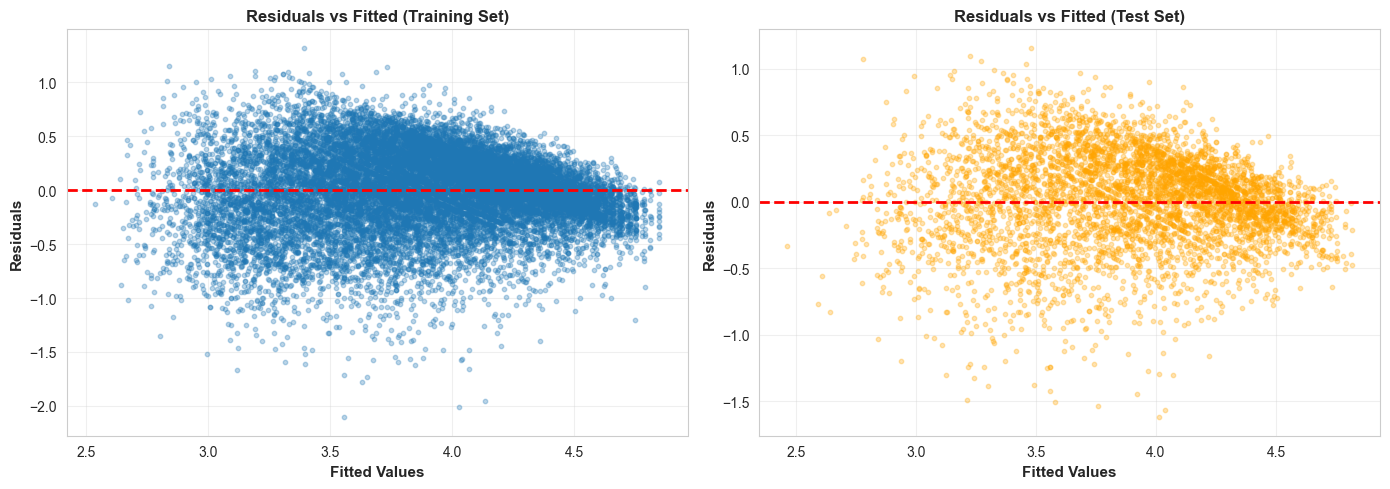

LINEARITY CHECK:
✓ Look for: Random scatter around zero (no clear pattern)
✗ Warning signs: Curved pattern, funnel shape, systematic trend
HOMOSKEDASTICITY CHECK:
✓ Look for: Constant spread of scattered point around zero
✗ Warning signs: Point are more/less spread out in some regions than others


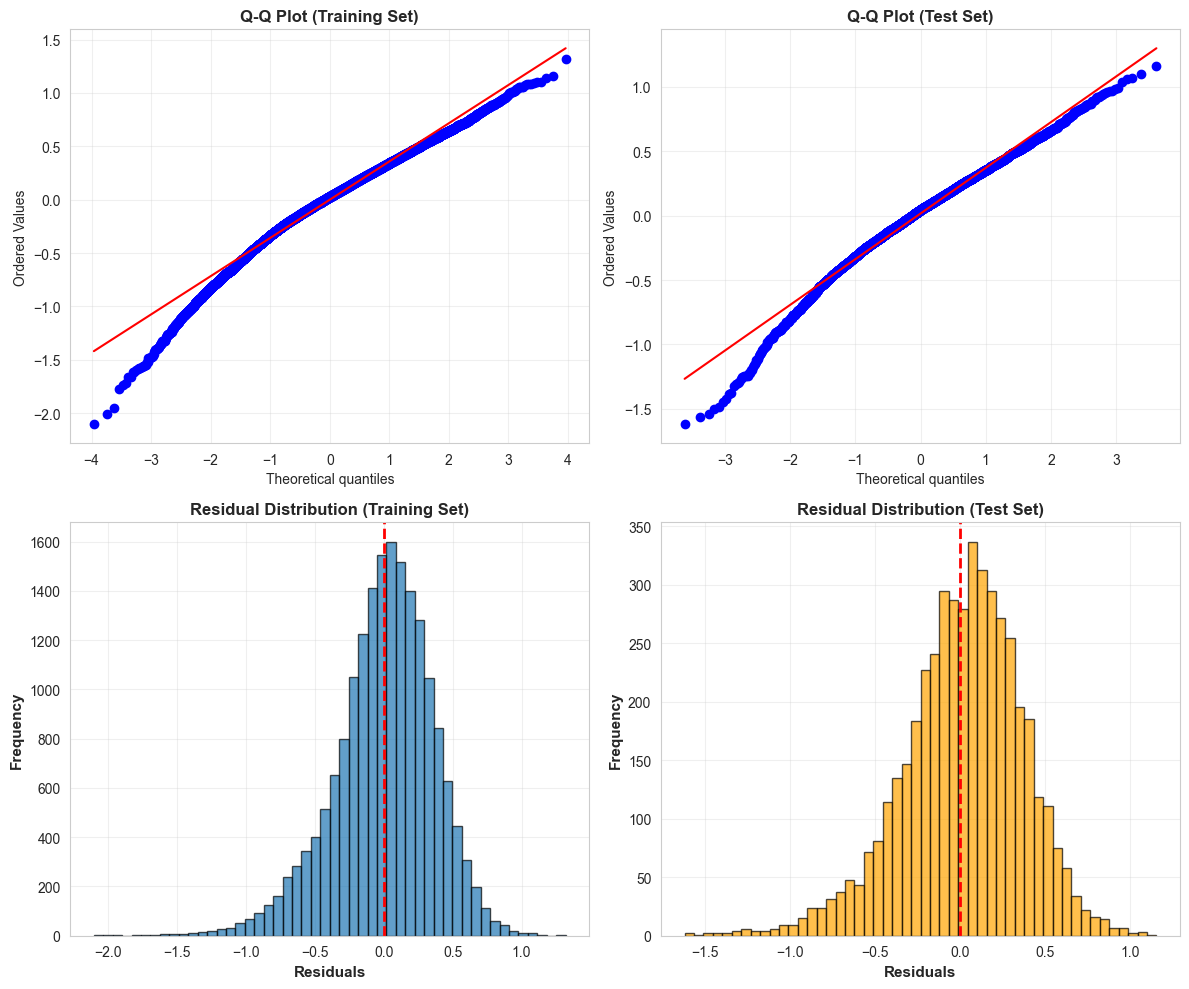


NORMALITY CHECK:
✓ Look for: Q-Q points follow diagonal line, histogram roughly bell-shaped
✗ Warning signs: Q-Q points deviate from line (especially at tails), skewed histogram

Note: With large sample size (n=23,281), slight deviations from normality
are less concerning due to Central Limit Theorem.

INDEPENDENCE CHECK:
✓ Addressed by study design: Each professor is an independent observation
✓ No repeated measures or time series structure
✓ Assumption satisfied by data collection methodology


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Get predictions and residuals
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# ============================================================
# ASSUMPTION 1 and 2: LINEARITY and HOMOSKEDASTICITY (Residuals vs Fitted)
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train_pred, train_residuals, alpha=0.3, s=10)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Fitted Values', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0].set_title('Residuals vs Fitted (Training Set)', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test_pred, test_residuals, alpha=0.3, s=10, color='orange')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted Values', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[1].set_title('Residuals vs Fitted (Test Set)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("LINEARITY CHECK:")
print("✓ Look for: Random scatter around zero (no clear pattern)")
print("✗ Warning signs: Curved pattern, funnel shape, systematic trend")

print("HOMOSKEDASTICITY CHECK:")
print("✓ Look for: Constant spread of scattered point around zero")
print("✗ Warning signs: Point are more/less spread out in some regions than others")



# ============================================================
# ASSUMPTION 3: NORMALITY OF RESIDUALS
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Q-Q Plot - Training
stats.probplot(train_residuals, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot (Training Set)', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Q-Q Plot - Test
stats.probplot(test_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Test Set)', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Histogram - Training
axes[1, 0].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Residual Distribution (Training Set)', fontsize=12, fontweight='bold')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].grid(alpha=0.3)

# Histogram - Test
axes[1, 1].hist(test_residuals, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Residual Distribution (Test Set)', fontsize=12, fontweight='bold')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNORMALITY CHECK:")
print("✓ Look for: Q-Q points follow diagonal line, histogram roughly bell-shaped")
print("✗ Warning signs: Q-Q points deviate from line (especially at tails), skewed histogram")
print("\nNote: With large sample size (n=23,281), slight deviations from normality")
print("are less concerning due to Central Limit Theorem.")

# ============================================================
# ASSUMPTION 4: INDEPENDENCE
# ============================================================
print("\n" + "=" * 70)
print("INDEPENDENCE CHECK:")
print("=" * 70)
print("✓ Addressed by study design: Each professor is an independent observation")
print("✓ No repeated measures or time series structure")
print("✓ Assumption satisfied by data collection methodology")
print("=" * 70)

Validating Regression Assumptions
Multicollinearity - Already Handled
Before we even built the model, we checked for multicollinearity using VIF. Remember, all our tags had VIF below 5 (highest was "Good feedback" at 4.14). This told us the predictors play nicely together—they're not redundant or highly correlated. That means we can actually compute our coefficients without the math breaking down, and our estimates will be stable. Good to go.
Linearity and Homoscedasticity - The Must-Haves
After fitting the Lasso model, we looked at the residuals vs fitted values plot. This one plot lets us check two critical things:
Linearity check: Are the residuals randomly scattered around zero with no weird curves or patterns? Yes. This means our linear model is the right fit—we're not missing some obvious non-linear relationship.
Homoscedasticity check: Is the spread of residuals consistent across all fitted values, or does it fan out/narrow down? It's consistent. No funnel shapes. This means the noise in our data is stable—some observations aren't way noisier than others.
Both checks passed on training and test sets. The points just scatter randomly with constant spread. That's exactly what we want for getting good coefficient estimates.
Normality and Independence - The Nice-to-Haves
Now, technically we only need the above assumptions if we're just building the model and interpreting coefficients. But let's check the other two anyway, just to be thorough.
Normality check: We looked at Q-Q plots and histograms of residuals. The center looks pretty normal, but the tails are heavier than they should be—we've got some extreme residuals out there. This probably happens for two reasons: (1) some outlier ratings where students went really harsh or really generous, and (2) our model doesn't capture everything—there are factors we're not measuring like course difficulty, subject appeal, instructor personality, or even student biases (like gender).
Here's the thing though: this only matters if we're doing formal t-tests on our coefficients to say "is this coefficient significantly different from zero?" We're not really focused on that—we're interpreting the coefficients we got. Plus, with 23,281 observations, the Central Limit Theorem has our back. Even with non-normal residuals, if we wanted to do those tests, they'd still be approximately valid.
Independence check: This one's easy. Each professor is a separate person, rated independently. No time series, no repeated measures, no clustering. One professor's error has nothing to do with another's. Satisfied by design.